<center><h1>HosseinazadehKhaligh_Ehsan_HW4</h1></center>
<br>
<br>

###### Name: Ehsan Hosseinzadeh Khaligh
###### USC ID: 1112811250
###### GitHub:  https://github.com/ehsankhaligh

## 1. Time Series Classification Part 1: Feature Creation/Extraction (HW3 Rerun)

Import packages

In [1]:
import glob
import time
import os.path
from os import path
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats

#uncomment to install
#!pip install imblearn
#!pip install bootstrapped

from sklearn import datasets
from sklearn.metrics import roc_curve, auc
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

from IPython.display import display, HTML

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',100)

#### Steps from HW3

In [2]:
csv_files = sorted(glob.glob('../data/AReM/*/*.csv'))

test_files = ['bending1/dataset1.csv', 'bending1/dataset2.csv',
           'bending2/dataset1.csv', 'bending2/dataset2.csv',
           'cycling/dataset1.csv', 'cycling/dataset2.csv', 'cycling/dataset3.csv',
           'lying/dataset1.csv', 'lying/dataset2.csv', 'lying/dataset3.csv',
           'sitting/dataset1.csv', 'sitting/dataset2.csv', 'sitting/dataset3.csv',
           'standing/dataset1.csv', 'standing/dataset2.csv', 'standing/dataset3.csv',
           'walking/dataset1.csv', 'walking/dataset2.csv', 'walking/dataset3.csv']

test_file_list = []
train_file_list= []

for item in csv_files:
    
    if item.replace('../data/AReM/', '') in test_files:
        test_file_list.append(item)
        
    else:
        train_file_list.append(item)

In [3]:
df_header = ['min', 'max', 'mean', 'median', 'std', 'firstQuartile', 'thirdQuartile']
df_all_header = []
for x in range(1,7):
    for y in df_header:
        df_all_header.append(y+str(x))
        
df_all_header.append('label')

In [4]:
df_main_test = pd.DataFrame(columns=df_all_header)
df_main_train = pd.DataFrame(columns=df_all_header)

In [5]:
for csv_path in test_file_list:
    
    #debug
    #print(csv_path) 
    
    csv_path_split = csv_path.split('/')
    #../data/AReM/bending1/dataset1.csv
    #['..', 'data', 'AReM', 'bending1', 'dataset1.csv']
    label = csv_path_split[3]
    #print(label)
    
    df = pd.read_csv(csv_path, comment='#', header=None) 
    
    new_row = { 'min1': df.describe()[1][3],
                'max1': df.describe()[1][7],
                'mean1': df.describe()[1][1],
                'median1': df.describe()[1][5],
                'std1': df.describe()[1][2],
                'firstQuartile1': df.describe()[1][4],
                'thirdQuartile1': df.describe()[1][6],

                'min2': df.describe()[2][3],
                'max2': df.describe()[2][7],
                'mean2': df.describe()[2][1],
                'median2': df.describe()[2][5],
                'std2': df.describe()[2][2],
                'firstQuartile2': df.describe()[2][4],
                'thirdQuartile2': df.describe()[2][6],

                'min3': df.describe()[3][3],
                'max3': df.describe()[3][7],
                'mean3': df.describe()[3][1],
                'median3': df.describe()[3][5],
                'std3': df.describe()[3][2],
                'firstQuartile3': df.describe()[3][4],
                'thirdQuartile3': df.describe()[3][6],

                'min4': df.describe()[4][3],
                'max4': df.describe()[4][7],
                'mean4': df.describe()[4][1],
                'median4': df.describe()[4][5],
                'std4': df.describe()[4][2],
                'firstQuartile4': df.describe()[4][4],
                'thirdQuartile4': df.describe()[4][6],
               
                'min5': df.describe()[5][3],
                'max5': df.describe()[5][7],
                'mean5': df.describe()[5][1],
                'median5': df.describe()[5][5],
                'std5': df.describe()[5][2],
                'firstQuartile5': df.describe()[5][4],
                'thirdQuartile5': df.describe()[5][6],

                'min6': df.describe()[6][3],
                'max6': df.describe()[6][7],
                'mean6': df.describe()[6][1],
                'median6': df.describe()[6][5],
                'std6': df.describe()[6][2],
                'firstQuartile6': df.describe()[6][4],
                'thirdQuartile6': df.describe()[6][6],
               
                'label': label
          }

    df_main_test = df_main_test.append(new_row, ignore_index=True)    


df_main_test_2_a = df_main_test
display(df_main_test.head())

min1   max1      mean1 median1      std1 firstQuartile1 thirdQuartile1  \
0  37.25   45.0  40.624792    40.5  1.476967          39.25           42.0   
1   38.0  45.67  42.812812    42.5   1.43555           42.0          43.67   
2  12.75   51.0  24.562958   24.25  3.737514        23.1875           26.5   
3    0.0  42.75  27.464604    28.0  3.583582           25.5           30.0   
4  24.25   45.0  37.177042   36.25  3.581301           34.5          40.25   

  min2  max2     mean2 median2      std2 firstQuartile2 thirdQuartile2 min3  \
0  0.0   1.3  0.358604    0.43  0.322605            0.0            0.5  4.0   
1  0.0  1.22  0.372438    0.47  0.289158            0.0            0.5  2.0   
2  0.0  6.87  0.590833    0.43  0.837408            0.0           0.71  0.0   
3  0.0  7.76  0.449708    0.43  0.767197            0.0            0.5  7.5   
4  0.0  8.58  2.374208    1.92  1.601799            1.3           3.13  5.5   

    max3      mean3 median3      std3 firstQuartile3 thirdQuartile3 min4  \
0   29.5  19.040937   19.25  4.462952           16.0          23.25  0.0   
1   29.5  20.096979    21.0  3.893737           19.0          22.25  0.0   
2  25.33  19.121333   20.25  4.299612           18.0           22.0  0.0   
3   35.0  20.842542   20.75  3.826268           18.0           22.5  0.0   
4  26.75  16.531083   16.67  3.430906          14.25           19.0  0.0   

   max4     mean4 median4      std4 firstQuartile4 thirdQuartile4   min5  \
0  7.23  0.832542     0.5  0.965659            0.0           1.12  27.25   
1  5.76  0.876438     0.5  1.047259            0.0          1.145  27.67   
2  6.76  0.736771    0.47  0.927048            0.0           0.87  10.67   
3  5.76  0.779917     0.5  0.904436            0.0           0.94    0.0   
4  8.05  2.910604    2.62  1.600137           1.64         3.9175    7.0   

    max5      mean5 median5      std5 firstQuartile5 thirdQuartile5 min6  \
0  38.25  34.311292    35.0  2.188449           33.0           36.0  0.0   
1   38.5  33.024583    33.0  1.995255           32.0           34.5  0.0   
2   30.0  23.493042   23.75  3.693786           20.5           27.0  0.0   
3   33.0  17.617937    18.0  5.053642           15.0          20.75  0.0   
4   25.5   19.60725    20.0  2.890347          17.95          21.75  0.0   

   max6     mean6 median6      std6 firstQuartile6 thirdQuartile6     label  
0  1.92  0.570583    0.43  0.582915            0.0            1.3  bending1  
1  3.11  0.571083    0.43   0.60101            0.0            1.3  bending1  
2  4.97  0.700188     0.5   0.69372           0.43           0.87  bending2  
3  6.76  1.122125    0.83  1.012342           0.47            1.3  bending2  
4  9.34  2.921729     2.5    1.8526            1.5            3.9   cycling

In [6]:
#Cleaned: ../AReM/cycling/dataset14.csv, /data/AReM/cycling/dataset9.csv

csv_files_space = ['../data/AReM/bending2/dataset4.csv']

for csv_path in train_file_list:
    
    #print(csv_path)  
        
    csv_path_split = csv_path.split('/')
    #../data/AReM/bending1/dataset1.csv
    #['..', 'data', 'AReM', 'bending1', 'dataset1.csv']
    label = csv_path_split[3]
    #print(label)
        
    if csv_path in csv_files_space:
        df = pd.read_csv(csv_path, comment='#', header=None, delimiter=r"\s+")

    else:
        df = pd.read_csv(csv_path, comment='#', header=None)
    
    new_row = { 'min1': df.describe()[1][3],
                'max1': df.describe()[1][7],
                'mean1': df.describe()[1][1],
                'median1': df.describe()[1][5],
                'std1': df.describe()[1][2],
                'firstQuartile1': df.describe()[1][4],
                'thirdQuartile1': df.describe()[1][6],

                'min2': df.describe()[2][3],
                'max2': df.describe()[2][7],
                'mean2': df.describe()[2][1],
                'median2': df.describe()[2][5],
                'std2': df.describe()[2][2],
                'firstQuartile2': df.describe()[2][4],
                'thirdQuartile2': df.describe()[2][6],

                'min3': df.describe()[3][3],
                'max3': df.describe()[3][7],
                'mean3': df.describe()[3][1],
                'median3': df.describe()[3][5],
                'std3': df.describe()[3][2],
                'firstQuartile3': df.describe()[3][4],
                'thirdQuartile3': df.describe()[3][6],

                'min4': df.describe()[4][3],
                'max4': df.describe()[4][7],
                'mean4': df.describe()[4][1],
                'median4': df.describe()[4][5],
                'std4': df.describe()[4][2],
                'firstQuartile4': df.describe()[4][4],
                'thirdQuartile4': df.describe()[4][6],
               
                'min5': df.describe()[5][3],
                'max5': df.describe()[5][7],
                'mean5': df.describe()[5][1],
                'median5': df.describe()[5][5],
                'std5': df.describe()[5][2],
                'firstQuartile5': df.describe()[5][4],
                'thirdQuartile5': df.describe()[5][6],

                'min6': df.describe()[6][3],
                'max6': df.describe()[6][7],
                'mean6': df.describe()[6][1],
                'median6': df.describe()[6][5],
                'std6': df.describe()[6][2],
                'firstQuartile6': df.describe()[6][4],
                'thirdQuartile6': df.describe()[6][6],
               
                'label': label
          }

    df_main_train = df_main_train.append(new_row, ignore_index=True)  


df_main_train_2_a = df_main_train #reassign to use un-cleaned 
display(df_main_train.head())

min1   max1      mean1 median1      std1 firstQuartile1 thirdQuartile1  \
0   35.0   47.4    43.9545   44.33  1.558835           43.0           45.0   
1   33.0  47.75  42.179813    43.5  3.670666          39.15           45.0   
2   33.0  45.75  41.678063   41.75   2.24349          41.33          42.75   
3   37.0   48.0  43.454958   43.25  1.386098           42.5           45.0   
4  36.25   48.0  43.969125    44.5  1.618364          43.31          44.67   

  min2  max2     mean2 median2      std2 firstQuartile2 thirdQuartile2  min3  \
0  0.0   1.7   0.42625    0.47   0.33869            0.0            0.5   6.5   
1  0.0   3.0  0.696042     0.5   0.63086            0.0           1.12   8.5   
2  0.0  2.83  0.535979     0.5  0.405469           0.43           0.71   3.0   
3  0.0  1.58  0.378083    0.47  0.315566            0.0            0.5  5.75   
4  0.0   1.5  0.413125    0.47  0.263111           0.43            0.5   1.5   

    max3      mean3 median3      std3 firstQuartile3 thirdQuartile3 min4  \
0  29.75  22.122354    23.0  3.030943          19.75           24.0  0.0   
1   30.0  22.183625    23.0  3.810469           20.5        24.3725  0.0   
2  28.25  19.006562  19.125  4.087107           16.5        22.0625  0.0   
3   27.0  15.793333    15.0  3.847638           13.0          18.27  0.0   
4  26.33  15.868021   16.25   3.74242          14.25           18.0  0.0   

    max4     mean4 median4      std4 firstQuartile4 thirdQuartile4   min5  \
0   4.44  0.497313    0.43  0.550657            0.0           0.83   29.0   
1   5.15  0.989917    0.83   0.95373           0.43            1.3   20.0   
2   6.42  0.841875     0.5  0.928801           0.43           1.12  23.67   
3  10.03  0.849354     0.5  0.995761           0.43           1.12    8.0   
4   5.17  0.666354    0.47  0.788985            0.0           0.94  11.33   

    max5      mean5 median5      std5 firstQuartile5 thirdQuartile5 min6  \
0   38.5  35.588458    36.0  1.999604        35.3625           36.5  0.0   
1  38.67  33.493917    35.0  3.849448        30.4575          36.33  0.0   
2   37.5  29.857083    30.0  2.411026        28.4575          31.25  0.0   
3   33.5  23.034792    23.5  2.488862          22.25           24.0  0.0   
4  30.75   22.10375   21.67  3.318301           20.5          23.75  0.0   

   max6     mean6 median6      std6 firstQuartile6 thirdQuartile6     label  
0  1.79  0.493292    0.43  0.513506            0.0           0.94  bending1  
1  2.18  0.613521     0.5  0.524317            0.0            1.0  bending1  
2  1.79  0.383292    0.43  0.389164            0.0            0.5  bending1  
3  5.26  0.679646     0.5  0.622534           0.43           0.87  bending1  
4  2.96  0.555313    0.49  0.487826            0.0           0.83  bending1

In [7]:
display(df_main_test.shape)
display(df_main_test.head())

display(df_main_train.shape)
display(df_main_train.head())

(19, 43)

min1   max1      mean1 median1      std1 firstQuartile1 thirdQuartile1  \
0  37.25   45.0  40.624792    40.5  1.476967          39.25           42.0   
1   38.0  45.67  42.812812    42.5   1.43555           42.0          43.67   
2  12.75   51.0  24.562958   24.25  3.737514        23.1875           26.5   
3    0.0  42.75  27.464604    28.0  3.583582           25.5           30.0   
4  24.25   45.0  37.177042   36.25  3.581301           34.5          40.25   

  min2  max2     mean2 median2      std2 firstQuartile2 thirdQuartile2 min3  \
0  0.0   1.3  0.358604    0.43  0.322605            0.0            0.5  4.0   
1  0.0  1.22  0.372438    0.47  0.289158            0.0            0.5  2.0   
2  0.0  6.87  0.590833    0.43  0.837408            0.0           0.71  0.0   
3  0.0  7.76  0.449708    0.43  0.767197            0.0            0.5  7.5   
4  0.0  8.58  2.374208    1.92  1.601799            1.3           3.13  5.5   

    max3      mean3 median3      std3 firstQuartile3 thirdQuartile3 min4  \
0   29.5  19.040937   19.25  4.462952           16.0          23.25  0.0   
1   29.5  20.096979    21.0  3.893737           19.0          22.25  0.0   
2  25.33  19.121333   20.25  4.299612           18.0           22.0  0.0   
3   35.0  20.842542   20.75  3.826268           18.0           22.5  0.0   
4  26.75  16.531083   16.67  3.430906          14.25           19.0  0.0   

   max4     mean4 median4      std4 firstQuartile4 thirdQuartile4   min5  \
0  7.23  0.832542     0.5  0.965659            0.0           1.12  27.25   
1  5.76  0.876438     0.5  1.047259            0.0          1.145  27.67   
2  6.76  0.736771    0.47  0.927048            0.0           0.87  10.67   
3  5.76  0.779917     0.5  0.904436            0.0           0.94    0.0   
4  8.05  2.910604    2.62  1.600137           1.64         3.9175    7.0   

    max5      mean5 median5      std5 firstQuartile5 thirdQuartile5 min6  \
0  38.25  34.311292    35.0  2.188449           33.0           36.0  0.0   
1   38.5  33.024583    33.0  1.995255           32.0           34.5  0.0   
2   30.0  23.493042   23.75  3.693786           20.5           27.0  0.0   
3   33.0  17.617937    18.0  5.053642           15.0          20.75  0.0   
4   25.5   19.60725    20.0  2.890347          17.95          21.75  0.0   

   max6     mean6 median6      std6 firstQuartile6 thirdQuartile6     label  
0  1.92  0.570583    0.43  0.582915            0.0            1.3  bending1  
1  3.11  0.571083    0.43   0.60101            0.0            1.3  bending1  
2  4.97  0.700188     0.5   0.69372           0.43           0.87  bending2  
3  6.76  1.122125    0.83  1.012342           0.47            1.3  bending2  
4  9.34  2.921729     2.5    1.8526            1.5            3.9   cycling

(69, 43)

min1   max1      mean1 median1      std1 firstQuartile1 thirdQuartile1  \
0   35.0   47.4    43.9545   44.33  1.558835           43.0           45.0   
1   33.0  47.75  42.179813    43.5  3.670666          39.15           45.0   
2   33.0  45.75  41.678063   41.75   2.24349          41.33          42.75   
3   37.0   48.0  43.454958   43.25  1.386098           42.5           45.0   
4  36.25   48.0  43.969125    44.5  1.618364          43.31          44.67   

  min2  max2     mean2 median2      std2 firstQuartile2 thirdQuartile2  min3  \
0  0.0   1.7   0.42625    0.47   0.33869            0.0            0.5   6.5   
1  0.0   3.0  0.696042     0.5   0.63086            0.0           1.12   8.5   
2  0.0  2.83  0.535979     0.5  0.405469           0.43           0.71   3.0   
3  0.0  1.58  0.378083    0.47  0.315566            0.0            0.5  5.75   
4  0.0   1.5  0.413125    0.47  0.263111           0.43            0.5   1.5   

    max3      mean3 median3      std3 firstQuartile3 thirdQuartile3 min4  \
0  29.75  22.122354    23.0  3.030943          19.75           24.0  0.0   
1   30.0  22.183625    23.0  3.810469           20.5        24.3725  0.0   
2  28.25  19.006562  19.125  4.087107           16.5        22.0625  0.0   
3   27.0  15.793333    15.0  3.847638           13.0          18.27  0.0   
4  26.33  15.868021   16.25   3.74242          14.25           18.0  0.0   

    max4     mean4 median4      std4 firstQuartile4 thirdQuartile4   min5  \
0   4.44  0.497313    0.43  0.550657            0.0           0.83   29.0   
1   5.15  0.989917    0.83   0.95373           0.43            1.3   20.0   
2   6.42  0.841875     0.5  0.928801           0.43           1.12  23.67   
3  10.03  0.849354     0.5  0.995761           0.43           1.12    8.0   
4   5.17  0.666354    0.47  0.788985            0.0           0.94  11.33   

    max5      mean5 median5      std5 firstQuartile5 thirdQuartile5 min6  \
0   38.5  35.588458    36.0  1.999604        35.3625           36.5  0.0   
1  38.67  33.493917    35.0  3.849448        30.4575          36.33  0.0   
2   37.5  29.857083    30.0  2.411026        28.4575          31.25  0.0   
3   33.5  23.034792    23.5  2.488862          22.25           24.0  0.0   
4  30.75   22.10375   21.67  3.318301           20.5          23.75  0.0   

   max6     mean6 median6      std6 firstQuartile6 thirdQuartile6     label  
0  1.79  0.493292    0.43  0.513506            0.0           0.94  bending1  
1  2.18  0.613521     0.5  0.524317            0.0            1.0  bending1  
2  1.79  0.383292    0.43  0.389164            0.0            0.5  bending1  
3  5.26  0.679646     0.5  0.622534           0.43           0.87  bending1  
4  2.96  0.555313    0.49  0.487826            0.0           0.83  bending1

In [8]:
#we need to first merge two dfs 
train_test_df = df_main_train.append(df_main_test, ignore_index=True)
train_test_df.head()

min1   max1      mean1 median1      std1 firstQuartile1 thirdQuartile1  \
0   35.0   47.4    43.9545   44.33  1.558835           43.0           45.0   
1   33.0  47.75  42.179813    43.5  3.670666          39.15           45.0   
2   33.0  45.75  41.678063   41.75   2.24349          41.33          42.75   
3   37.0   48.0  43.454958   43.25  1.386098           42.5           45.0   
4  36.25   48.0  43.969125    44.5  1.618364          43.31          44.67   

  min2  max2     mean2 median2      std2 firstQuartile2 thirdQuartile2  min3  \
0  0.0   1.7   0.42625    0.47   0.33869            0.0            0.5   6.5   
1  0.0   3.0  0.696042     0.5   0.63086            0.0           1.12   8.5   
2  0.0  2.83  0.535979     0.5  0.405469           0.43           0.71   3.0   
3  0.0  1.58  0.378083    0.47  0.315566            0.0            0.5  5.75   
4  0.0   1.5  0.413125    0.47  0.263111           0.43            0.5   1.5   

    max3      mean3 median3      std3 firstQuartile3 thirdQuartile3 min4  \
0  29.75  22.122354    23.0  3.030943          19.75           24.0  0.0   
1   30.0  22.183625    23.0  3.810469           20.5        24.3725  0.0   
2  28.25  19.006562  19.125  4.087107           16.5        22.0625  0.0   
3   27.0  15.793333    15.0  3.847638           13.0          18.27  0.0   
4  26.33  15.868021   16.25   3.74242          14.25           18.0  0.0   

    max4     mean4 median4      std4 firstQuartile4 thirdQuartile4   min5  \
0   4.44  0.497313    0.43  0.550657            0.0           0.83   29.0   
1   5.15  0.989917    0.83   0.95373           0.43            1.3   20.0   
2   6.42  0.841875     0.5  0.928801           0.43           1.12  23.67   
3  10.03  0.849354     0.5  0.995761           0.43           1.12    8.0   
4   5.17  0.666354    0.47  0.788985            0.0           0.94  11.33   

    max5      mean5 median5      std5 firstQuartile5 thirdQuartile5 min6  \
0   38.5  35.588458    36.0  1.999604        35.3625           36.5  0.0   
1  38.67  33.493917    35.0  3.849448        30.4575          36.33  0.0   
2   37.5  29.857083    30.0  2.411026        28.4575          31.25  0.0   
3   33.5  23.034792    23.5  2.488862          22.25           24.0  0.0   
4  30.75   22.10375   21.67  3.318301           20.5          23.75  0.0   

   max6     mean6 median6      std6 firstQuartile6 thirdQuartile6     label  
0  1.79  0.493292    0.43  0.513506            0.0           0.94  bending1  
1  2.18  0.613521     0.5  0.524317            0.0            1.0  bending1  
2  1.79  0.383292    0.43  0.389164            0.0            0.5  bending1  
3  5.26  0.679646     0.5  0.622534           0.43           0.87  bending1  
4  2.96  0.555313    0.49  0.487826            0.0           0.83  bending1

In [9]:
df_iii = pd.DataFrame(columns = ['feature', 'std', 'interval'])

train_test_df = train_test_df.drop(columns=['label'])
for col_name in list(train_test_df.columns.values):
    
    #print(col_name)
    
    feature_val_list = train_test_df[col_name].to_numpy()
    feature_val_list = [np.float64(x) for x in feature_val_list]
    feature_val_list = np.asarray(feature_val_list)

    
    bootstrap_std_devs = bs.bootstrap(feature_val_list, stat_func=bs_stats.std, alpha=0.1, num_iterations=10000)
    df_iii = df_iii.append({'feature' : col_name, 'std' : bootstrap_std_devs.value, 'interval' : str(round(bootstrap_std_devs.lower_bound, 4))+','+str(round(bootstrap_std_devs.upper_bound, 4))}, ignore_index = True)

display(df_iii.head())

feature       std        interval
0     min1  9.515445  8.3189,10.8032
1     max1  4.369322    3.457,5.4223
2    mean1  5.305314   4.7704,5.9281
3  median1  5.409056   4.8458,6.0512
4     std1  1.762056   1.5848,1.9646

I did an online research and this question is a big topic. In general I would create ML to see correlation between features. However, based on what I read, I would choose STD, mean, max.  (I chose range as new one because I believe min and max are both imp and to have both selected range)

## 2. Time Series Classification Part 2: Binary and Multiclass Classification

### (a) Binary Classification Using Logistic Regression

#### i. Plots

In [10]:
features = ["std1","mean1","max1",
            "std2","mean2","max2",
            "std6","mean6","max6"]

hue_list=[]
for item in df_main_train_2_a['label'].values:
    #print(item)
    if 'bending' in item:
        hue_list.append('bending')
    else:
        hue_list.append('other')

#print(hue_list)
df_main_train_2_a['label'] = hue_list

In [11]:
features.append('label')
df = df_main_train_2_a[features]
df.head()

std1      mean1   max1      std2     mean2  max2      std6     mean6  \
0  1.558835    43.9545   47.4   0.33869   0.42625   1.7  0.513506  0.493292   
1  3.670666  42.179813  47.75   0.63086  0.696042   3.0  0.524317  0.613521   
2   2.24349  41.678063  45.75  0.405469  0.535979  2.83  0.389164  0.383292   
3  1.386098  43.454958   48.0  0.315566  0.378083  1.58  0.622534  0.679646   
4  1.618364  43.969125   48.0  0.263111  0.413125   1.5  0.487826  0.555313   

   max6    label  
0  1.79  bending  
1  2.18  bending  
2  1.79  bending  
3  5.26  bending  
4  2.96  bending

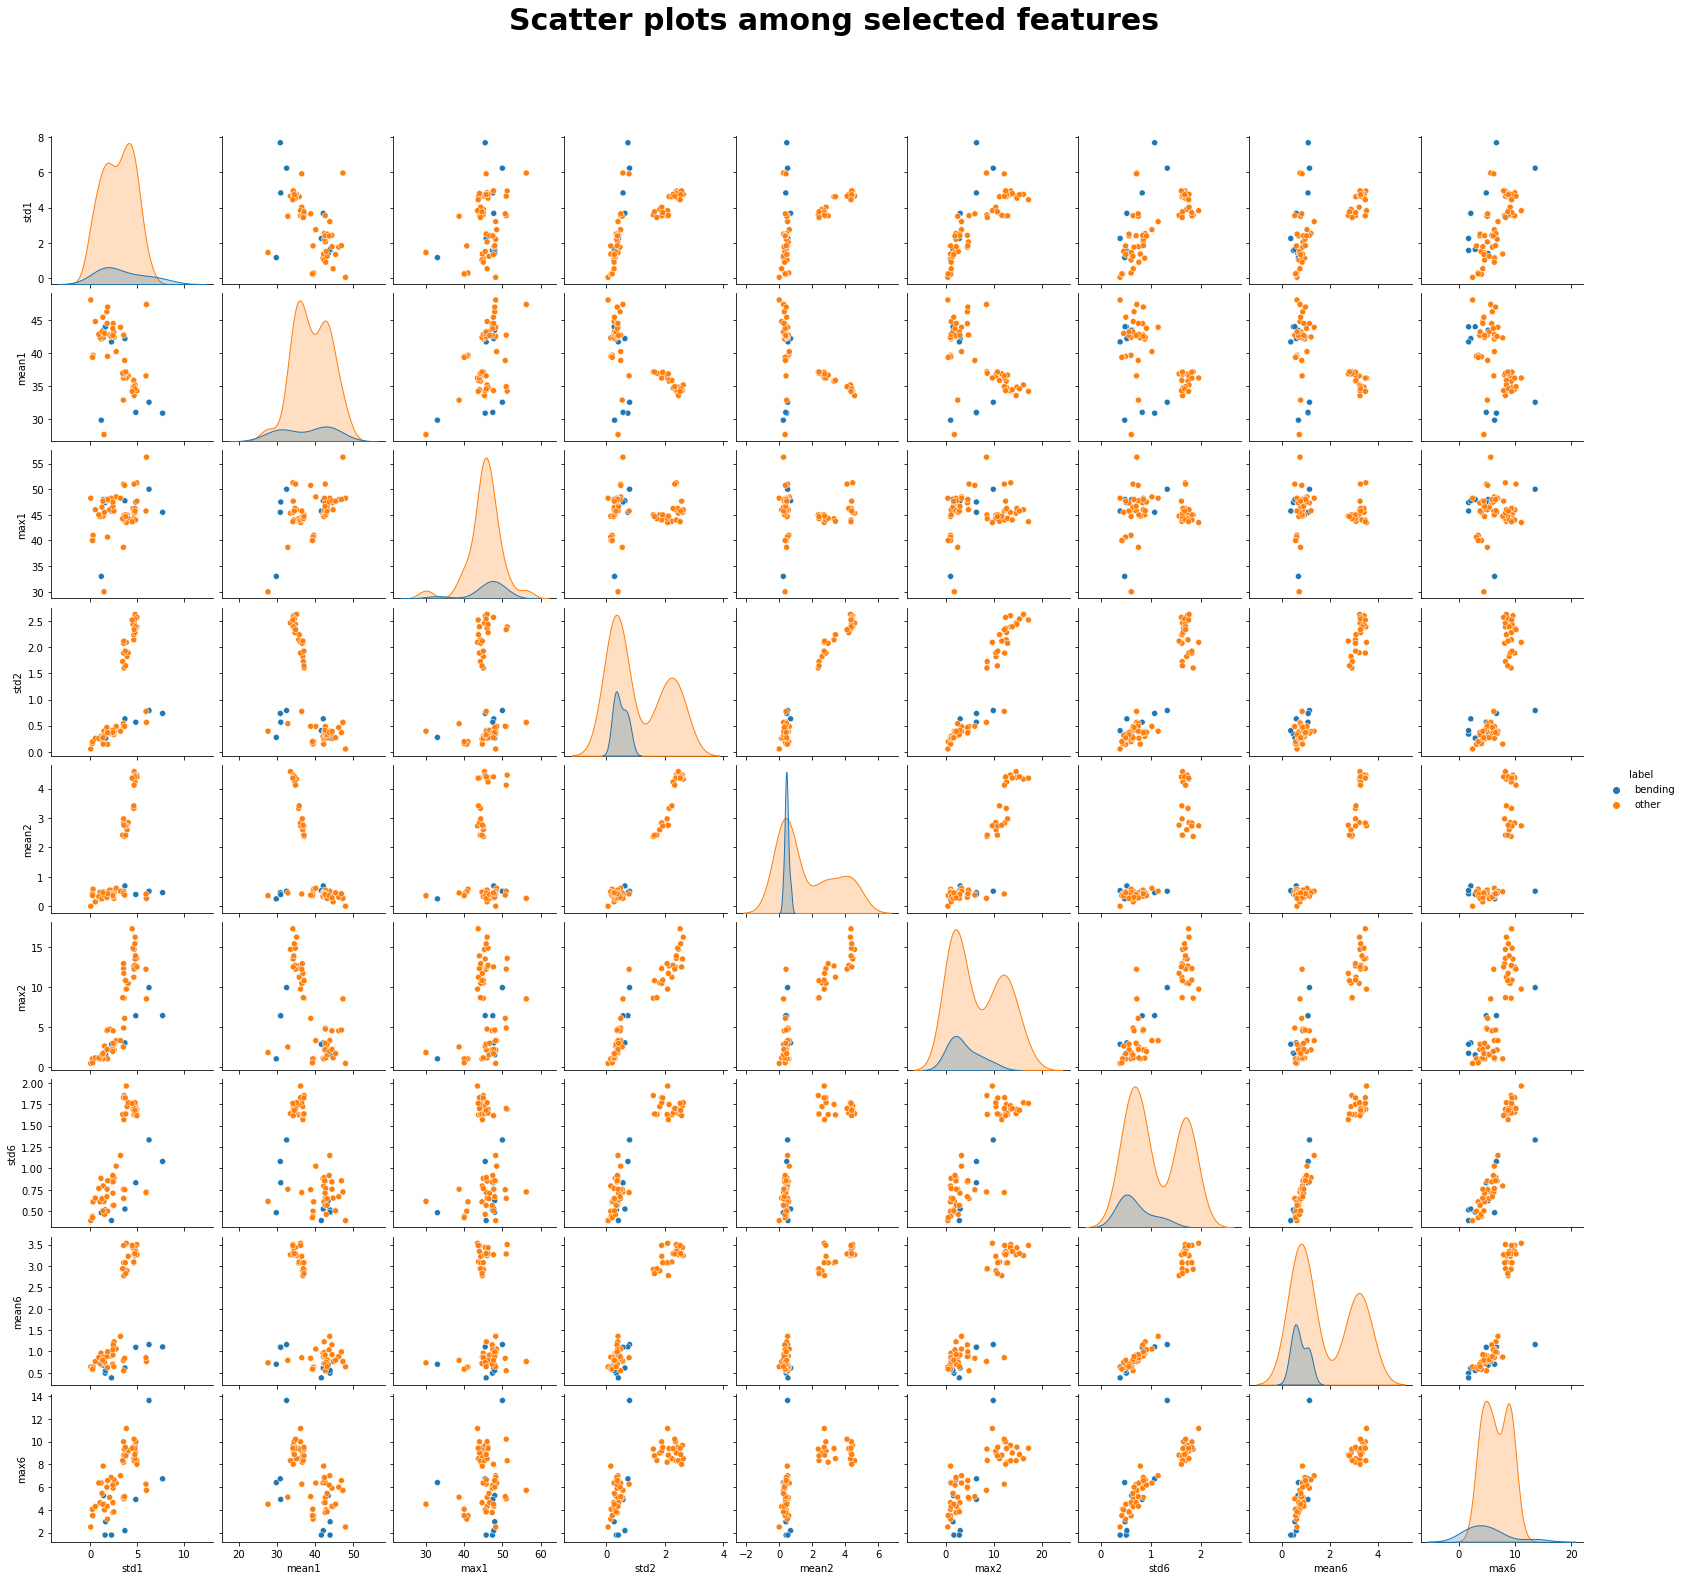

In [12]:
#plots of training set
pairplot=sns.pairplot(df, hue='label')
plt.subplots_adjust(top=0.9)
pairplot.fig.suptitle("Scatter plots among selected features", size=30, weight="bold")
plt.show()

#### ii. Splitted Plots

In [13]:
df_header = ['min', 'max', 'mean', 'median', 'std', 'firstQuartile', 'thirdQuartile']
df_all_header = []
for x in range(1,13):
    for y in df_header:
        df_all_header.append(y+str(x))
        
df_all_header.append('label')
df_main_train_2ii = pd.DataFrame(columns=df_all_header)

In [14]:
#Cleaned: ../AReM/cycling/dataset14.csv, /data/AReM/cycling/dataset9.csv

csv_files_space = ['../data/AReM/bending2/dataset4.csv']

for csv_path in train_file_list:
    
    #print(csv_path)  
        
    csv_path_split = csv_path.split('/')
    label = csv_path_split[3]
        
    if csv_path in csv_files_space:
        df = pd.read_csv(csv_path, comment='#', header=None, delimiter=r"\s+")

    else:
        df = pd.read_csv(csv_path, comment='#', header=None)
    
    df = df.drop(df.columns[[0]], axis=1) 
    
    merged_df = pd.concat([df[:240].reset_index(drop=True), df[240:].reset_index(drop=True)], axis=1)
    
    
    # 0 -> 'avg_rss12_1', 1 -> 'var_rss12_1', 2 -> 'avg_rss13_1', 3 -> 'var_rss13_1', 4 -> 'avg_rss23_1', 5 -> 'var_rss23_1',
    #'6 -> avg_rss12_2',  7 -> 'var_rss12_2', 8 -> 'avg_rss13_2', 9 -> 'var_rss13_2', 10 -> 'avg_rss23_2', 11 -> 'var_rss23_2']
    
    merged_df.columns = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
        
    new_row = { 'min1': merged_df.describe()[0][3],
                'max1': merged_df.describe()[0][7],
                'mean1': merged_df.describe()[0][1],
                'median1': merged_df.describe()[0][5],
                'std1': merged_df.describe()[0][2],
                'firstQuartile1': merged_df.describe()[0][4],
                'thirdQuartile1': merged_df.describe()[0][6],

                'min2': merged_df.describe()[1][3],
                'max2': merged_df.describe()[1][7],
                'mean2': merged_df.describe()[1][1],
                'median2': merged_df.describe()[1][5],
                'std2': merged_df.describe()[1][2],
                'firstQuartile2': merged_df.describe()[1][4],
                'thirdQuartile2': merged_df.describe()[1][6],

                'min3': merged_df.describe()[2][3],
                'max3': merged_df.describe()[2][7],
                'mean3': merged_df.describe()[2][1],
                'median3': merged_df.describe()[2][5],
                'std3': merged_df.describe()[2][2],
                'firstQuartile3': merged_df.describe()[2][4],
                'thirdQuartile3': merged_df.describe()[2][6],

                'min4': merged_df.describe()[3][3],
                'max4': merged_df.describe()[3][7],
                'mean4': merged_df.describe()[3][1],
                'median4': merged_df.describe()[3][5],
                'std4': merged_df.describe()[3][2],
                'firstQuartile4': merged_df.describe()[3][4],
                'thirdQuartile4': merged_df.describe()[3][6],
               
                'min5': merged_df.describe()[4][3],
                'max5': merged_df.describe()[4][7],
                'mean5': merged_df.describe()[4][1],
                'median5': merged_df.describe()[4][5],
                'std5': merged_df.describe()[4][2],
                'firstQuartile5': merged_df.describe()[4][4],
                'thirdQuartile5': merged_df.describe()[4][6],

                'min6': merged_df.describe()[5][3],
                'max6': merged_df.describe()[5][7],
                'mean6': merged_df.describe()[5][1],
                'median6': merged_df.describe()[5][5],
                'std6': merged_df.describe()[5][2],
                'firstQuartile6': merged_df.describe()[5][4],
                'thirdQuartile6': merged_df.describe()[5][6],
               
                'min7': merged_df.describe()[6][3],
                'max7': merged_df.describe()[6][7],
                'mean7': merged_df.describe()[6][1],
                'median7': merged_df.describe()[6][5],
                'std7': merged_df.describe()[6][2],
                'firstQuartile7': merged_df.describe()[6][4],
                'thirdQuartile7': merged_df.describe()[6][6],
               
                'min8': merged_df.describe()[7][3],
                'max8': merged_df.describe()[7][7],
                'mean8': merged_df.describe()[7][1],
                'median8': merged_df.describe()[7][5],
                'std8': merged_df.describe()[7][2],
                'firstQuartile8': merged_df.describe()[7][4],
                'thirdQuartile8': merged_df.describe()[7][6],
               
                'min9': merged_df.describe()[8][3],
                'max9': merged_df.describe()[8][7],
                'mean9': merged_df.describe()[8][1],
                'median9': merged_df.describe()[8][5],
                'std9': merged_df.describe()[8][2],
                'firstQuartile9': merged_df.describe()[8][4],
                'thirdQuartile9': merged_df.describe()[8][6],
               
                'min10': merged_df.describe()[9][3],
                'max10': merged_df.describe()[9][7],
                'mean10': merged_df.describe()[9][1],
                'median10': merged_df.describe()[9][5],
                'std10': merged_df.describe()[9][2],
                'firstQuartile10': merged_df.describe()[9][4],
                'thirdQuartile10': merged_df.describe()[9][6],
               
                'min11': merged_df.describe()[10][3],
                'max11': merged_df.describe()[10][7],
                'mean11': merged_df.describe()[10][1],
                'median11': merged_df.describe()[10][5],
                'std11': merged_df.describe()[10][2],
                'firstQuartile11': merged_df.describe()[10][4],
                'thirdQuartile11': merged_df.describe()[10][6],
               
                'min12': merged_df.describe()[11][3],
                'max12': merged_df.describe()[11][7],
                'mean12': merged_df.describe()[11][1],
                'median12': merged_df.describe()[11][5],
                'std12': merged_df.describe()[11][2],
                'firstQuartile12': merged_df.describe()[11][4],
                'thirdQuartile12': merged_df.describe()[11][6],
               
                'label': label
    }

    df_main_train_2ii = df_main_train_2ii.append(new_row, ignore_index=True)  
    
df_main_train_2ii.head()

min1   max1      mean1 median1      std1 firstQuartile1 thirdQuartile1  \
0   36.5   46.5  44.057167    44.5  1.556971          43.25           45.0   
1  33.75  47.75  43.278875    45.0  3.473355           42.0          45.25   
2   33.0  45.75  41.621208   42.33  3.118644        39.6525          44.25   
3   39.0   48.0  44.117042    45.0  1.359836           43.5           45.0   
4  36.67   45.0  43.486208   43.71  1.281976          42.33           44.5   

  min2  max2     mean2 median2      std2 firstQuartile2 thirdQuartile2   min3  \
0  0.0   1.5  0.381042    0.47   0.32954            0.0            0.5  14.25   
1  0.0   3.0  0.673292   0.485  0.634285            0.0            1.0   11.0   
2  0.0  2.83  0.623083     0.5  0.489595           0.43           0.83    3.0   
3  0.0   1.3  0.250042     0.0  0.314099            0.0            0.5   6.25   
4  0.0   1.3  0.378667    0.47  0.284434            0.0            0.5    4.0   

    max3      mean3 median3      std3 firstQuartile3 thirdQuartile3 min4  \
0  29.25  23.096792    24.0  2.410625          21.75           24.0  0.0   
1   30.0   23.14125   23.75  3.123258           21.5        24.8125  0.0   
2  28.25  19.081458    19.5  5.102939          15.25           24.0  0.0   
3   27.0  17.744167    18.0  4.010149        15.1875           20.0  0.0   
4  26.33   16.39725  16.875  3.469237        14.6275           18.0  0.0   

    max4     mean4 median4      std4 firstQuartile4 thirdQuartile4   min5  \
0   2.74  0.493458    0.43   0.49842            0.0           0.83   30.0   
1   4.77  0.808042    0.71  0.769306           0.43           1.25  30.75   
2   6.42  1.115083   0.825  1.170828           0.43           1.63  23.67   
3  10.03     1.123    0.83  1.141589           0.47           1.41   10.0   
4   5.17  0.662958    0.47  0.832544            0.0          0.955  11.33   

    max5      mean5 median5      std5 firstQuartile5 thirdQuartile5 min6  \
0   38.5  36.293542   36.25  1.315724           36.0           37.0  0.0   
1  38.67  36.022125    36.0  1.650105           36.0           37.0  0.0   
2   37.5  30.078333    30.0  2.701406           28.5           31.5  0.0   
3   33.5  23.218708    23.5  2.967487          21.75          24.25  0.0   
4  30.75  22.325458  21.415   4.27161          19.25           24.0  0.0   

   max6     mean6 median6      std6 firstQuartile6 thirdQuartile6   min7  \
0  1.79   0.59825     0.5  0.526656            0.0            1.0   35.0   
1  1.53  0.640958   0.765  0.554542            0.0           1.22   33.0   
2  1.79  0.419083    0.43    0.4112            0.0           0.71  39.25   
3  5.26  0.815417    0.71  0.718016           0.43           1.12   37.0   
4  2.28  0.524875    0.47  0.486847            0.0           0.83  36.25   

    max7      mean7 median7      std7 firstQuartile7 thirdQuartile7 min8  \
0   47.4  43.851833    43.5  1.557168           43.0           45.0  0.0   
1   46.0   41.08075    42.0  3.537481          37.75           44.5  0.0   
2  43.67  41.734917    41.5   0.59592           41.5           42.0  0.0   
3   46.5  42.792875   42.67  1.058792           42.5           43.0  0.0   
4   48.0  44.452042    44.5  1.771251          44.25          44.75  0.0   

   max8     mean8 median8      std8 firstQuartile8 thirdQuartile8  min9  \
0   1.7  0.471458     0.5  0.342346           0.43            0.5   6.5   
1  2.86  0.718792     0.5  0.627915            0.0         1.2275   8.5   
2  1.12  0.448875     0.5   0.27305           0.43            0.5  12.5   
3  1.58  0.506125     0.5  0.260761           0.43            0.5  5.75   
4   1.5  0.447583     0.5  0.235493           0.43            0.5   1.5   

    max9      mean9 median9      std9 firstQuartile9 thirdQuartile9 min10  \
0  29.75  21.147917  20.625  3.270099        18.4575           24.0   0.0   
1  29.25     21.226    22.0  4.183731        18.6275           24.0   0.0   
2   24.0  18.931667    19.0  2.725349          17.25          20.75   0.0  

In [15]:
features = ["std1","mean1","max1",
            "std2","mean2","max2",
            "std6","mean6","max6",
            "std7","mean7","max7",
            "std8","mean8","max8",
            "std12","mean12","max12"]

hue_list=[]
for item in df_main_train_2ii['label'].values:
    #print(item)
    if 'bending' in item:
        hue_list.append('bending')
    else:
        hue_list.append('other')

#print(hue_list)
df_main_train_2ii['label'] = hue_list

In [16]:
features.append('label')
df_main_train_2ii = df_main_train_2ii[features]
df_main_train_2ii.head()

std1      mean1   max1      std2     mean2  max2      std6     mean6  \
0  1.556971  44.057167   46.5   0.32954  0.381042   1.5  0.526656   0.59825   
1  3.473355  43.278875  47.75  0.634285  0.673292   3.0  0.554542  0.640958   
2  3.118644  41.621208  45.75  0.489595  0.623083  2.83    0.4112  0.419083   
3  1.359836  44.117042   48.0  0.314099  0.250042   1.3  0.718016  0.815417   
4  1.281976  43.486208   45.0  0.284434  0.378667   1.3  0.486847  0.524875   

   max6      std7      mean7   max7      std8     mean8  max8     std12  \
0  1.79  1.557168  43.851833   47.4  0.342346  0.471458   1.7  0.478528   
1  1.53  3.537481   41.08075   46.0  0.627915  0.718792  2.86  0.491873   
2  1.79   0.59592  41.734917  43.67   0.27305  0.448875  1.12  0.363144   
3  5.26  1.058792  42.792875   46.5  0.260761  0.506125  1.58  0.473445   
4  2.28  1.771251  44.452042   48.0  0.235493  0.447583   1.5  0.487918   

     mean12 max12    label  
0  0.388333   1.5  bending  
1  0.586083  2.18  bending  
2    0.3475   1.5  bending  
3  0.543875  4.06  bending  
4   0.58575  2.96  bending

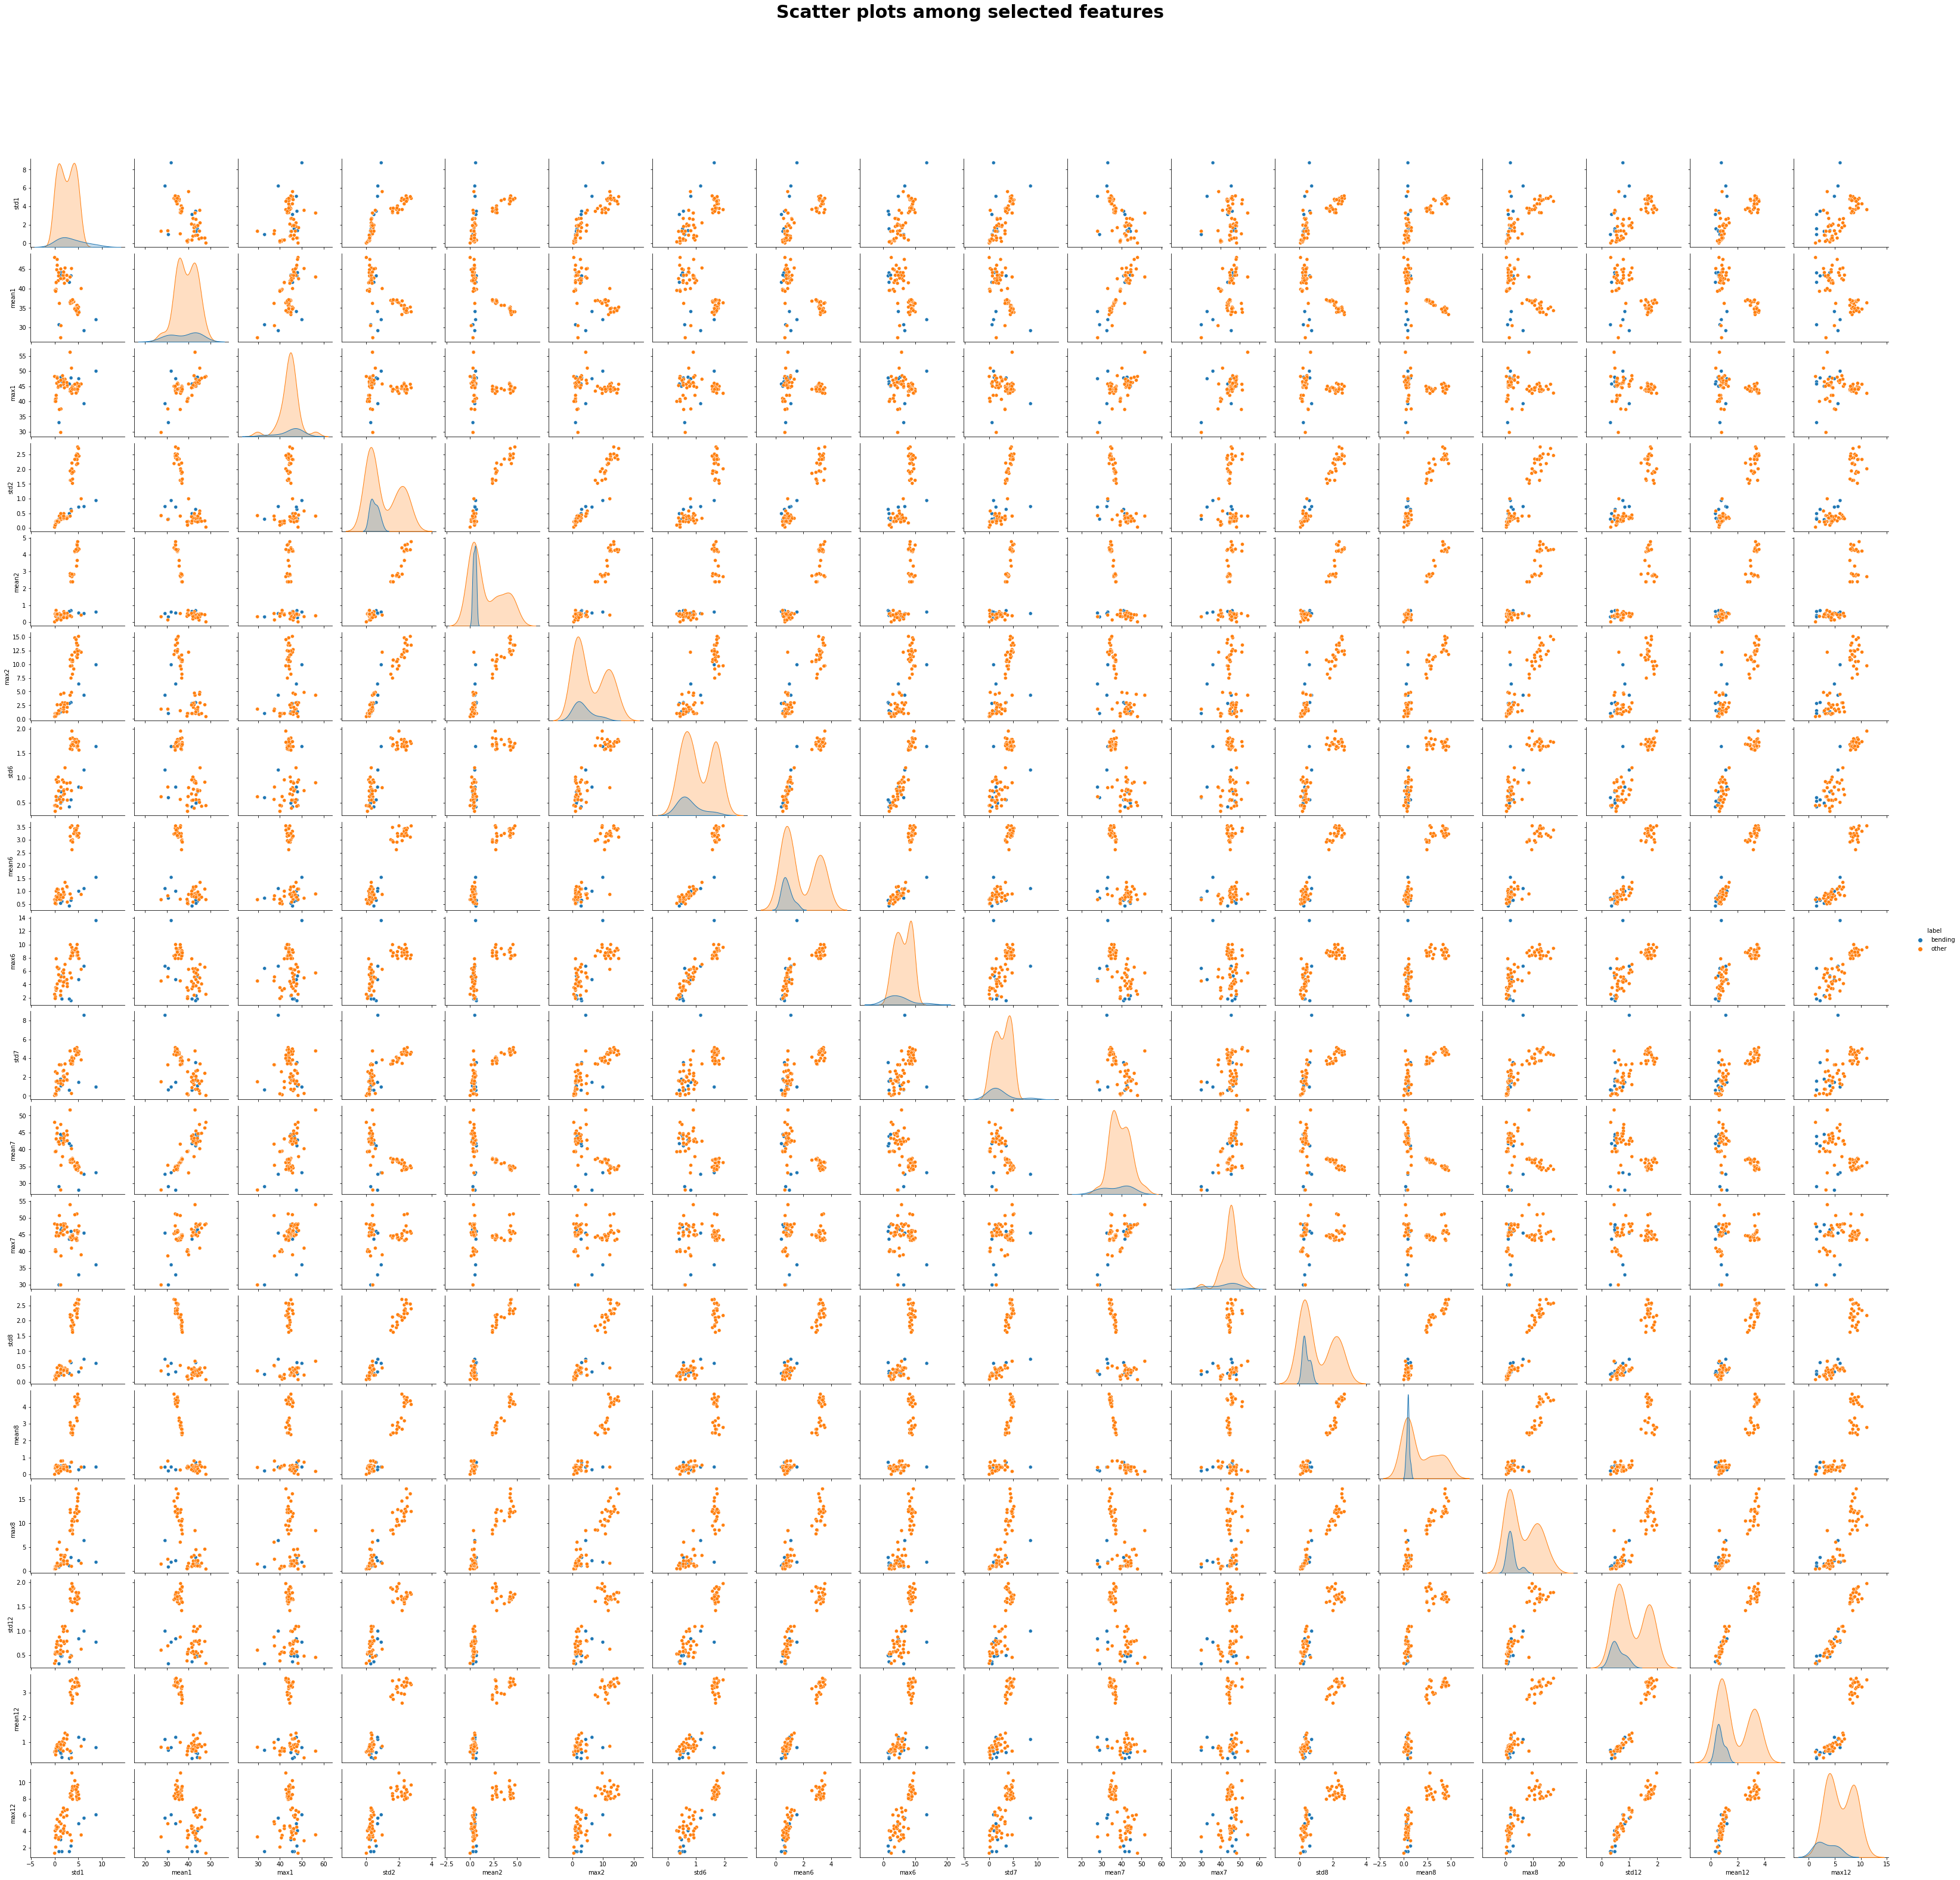

In [17]:
#plots of training set
pairplot=sns.pairplot(df_main_train_2ii, hue='label')
plt.subplots_adjust(top=0.9)
pairplot.fig.suptitle("Scatter plots among selected features", size=30, weight="bold")
plt.show()

After comparing step i & ii -> both look very similar 

#### iii. Time Series Segments

In [18]:
def headerCreation(l):
    df_header = ['min', 'max', 'mean', 'median', 'std', 'firstQuartile', 'thirdQuartile']
    df_all_header = []
    for x in range(1, 6*l+1): #loop through size of l * 6 + 1
        for y in df_header:
            df_all_header.append(y+str(x))
        
    df_all_header.append('label')
    df_main_train_2iii = pd.DataFrame(columns=df_all_header)
    #display(df_main_train_2iii)
    return df_main_train_2iii

In [19]:
def populateDataframe(l, stats_df, file_list, csv_files_space, type_data):
    
    for csv_path in file_list:
    
        #print(csv_path)  

        csv_path_split = csv_path.split('/')
        label = csv_path_split[3]

        if csv_path in csv_files_space:
            df = pd.read_csv(csv_path, comment='#', header=None, delimiter=r"\s+")

        else:
            df = pd.read_csv(csv_path, comment='#', header=None)

        df = df.drop(df.columns[[0]], axis=1) 

        ceil_num = int(np.ceil(df.shape[0]/l))
        #print("ceil_num:",ceil_num)
        
        split_tuple_range_list = list(zip(range(0, 499, ceil_num), range(0, 499, ceil_num)[1:]))
        merged_df = pd.concat([df.loc[e:f-1].reset_index(drop=True) for e,f in split_tuple_range_list], axis=1)
        #print("split_tuple_range_list:", split_tuple_range_list)
        #display(merged_df)

        multiply_num = len(split_tuple_range_list)
        merged_df.columns = [x for x in range(1,6*multiply_num+1)]
        
        if 'train' in type_data:
            path_write = '../saved_dfs/l'+str(l)+'_raw.csv'
            merged_df.to_csv(path_write, index=True)
        else:
            path_write = '../saved_dfs/l'+str(l)+'_raw_test.csv'
            merged_df.to_csv(path_write, index=True)

            
        new_row = {}
        for i in range(1, 6*l+1):
            new_row['max'+str(i)] = merged_df.describe()[i][3]
            new_row['min'+str(i)] = merged_df.describe()[i][3]
            new_row['max'+str(i)] = merged_df.describe()[i][7]
            new_row['mean'+str(i)] = merged_df.describe()[i][1]
            new_row['median'+str(i)] = merged_df.describe()[i][5]
            new_row['std'+str(i)] = merged_df.describe()[i][2]
            new_row['firstQuartile'+str(i)] = merged_df.describe()[i][4]
            new_row['thirdQuartile'+str(i)] = merged_df.describe()[i][6]
            
        
        if 'bending' in label:
            new_row['label'] = int(1)
        else:
            new_row['label'] = int(0)
            
        stats_df = stats_df.append(new_row, ignore_index=True)  

        #debug
        #display(merged_df.describe())
        #display(stats_df)
        #display(new_row)
        
    return stats_df

    

In [20]:
start_time = time.time()
csv_files_space = ['../data/AReM/bending2/dataset4.csv']

for l in range (1,21):
    
    print("L=",l)
    df_2iii=None
    
    #read saved df
    if path.exists('../saved_dfs/l'+str(l)+'_stats.csv') == True:
        df_2iii = pd.read_csv('../saved_dfs/l'+str(l)+'_stats.csv',  index_col=0)
    else:
        df_with_headers = headerCreation(l)
        df_2iii = populateDataframe(l, df_with_headers, train_file_list, csv_files_space, 'train')
        path_write = '../saved_dfs/l'+str(l)+'_stats.csv' #write df to save time in concat 
        df_2iii.to_csv(path_write, index=True)

    # we only want std, mean, max
    df_filtered = df_2iii.filter(regex='(std[1-9]|max[1-9]|mean[1-9]|label)')
    #display(df_filtered.head())

    #prep trainY, trainX
    mydf_filtered = df_filtered
    trainY = mydf_filtered['label']
    trainX = mydf_filtered.drop('label', axis=1)

    #display("trainY.shape:", trainY.shape)
    #display("trainX.shape:", trainX.shape)

    trainX = trainX.to_numpy()
    trainY = trainY.to_numpy()
    trainY = np.array(trainY, dtype=np.int)
    
    # Create a logistic regression model with no regularization
    model = LogisticRegression(penalty='none', max_iter=100)

    # Create a stratified k-fold cross-validation object with 5 folds
    cv = StratifiedKFold(n_splits=5)

    # Create a recursive feature elimination object with the logistic regression model and the cross-validation object
    selector = RFECV(estimator=model, step=1, cv=cv, scoring='accuracy')

    # Fit the recursive feature elimination object on the data
    selector.fit(trainX, trainY)
    
    best_features_select = selector.support_
    true_indices = []

    #select True valies and get index number
    for i in range(len(best_features_select)):
        if best_features_select[i]:
            true_indices.append(i)

    best_score = np.max(selector.grid_scores_)

    print('The optimal features num = ', selector.n_features_)
    print("index number of the optimal features = ", true_indices)
    print("scores: ",  selector.grid_scores_[selector.n_features_ - 1])
    print("Best Score:", best_score)
    print("------------------\n")

end_time = time.time()
total_time = end_time - start_time
print("Total time taken:", total_time, "seconds")

L= 1
The optimal features num =  1
index number of the optimal features =  [12]
scores:  [1.         1.         1.         0.92857143 1.        ]
Best Score: 1.0
------------------

L= 2
The optimal features num =  4
index number of the optimal features =  [0, 12, 13, 31]
scores:  [1. 1. 1. 1. 1.]
Best Score: 1.0
------------------

L= 3
The optimal features num =  11
index number of the optimal features =  [0, 3, 7, 12, 13, 18, 30, 31, 37, 49, 51]
scores:  [1.         1.         0.92857143 1.         1.        ]
Best Score: 1.0
------------------

L= 4
The optimal features num =  10
index number of the optimal features =  [0, 12, 13, 25, 31, 33, 37, 51, 67, 69]
scores:  [1. 1. 1. 1. 1.]
Best Score: 1.0
------------------

L= 5
The optimal features num =  2
index number of the optimal features =  [13, 31]
scores:  [1.         1.         0.92857143 0.92857143 1.        ]
Best Score: 1.0
------------------

L= 6
The optimal features num =  10
index number of the optimal features =  [7, 1

1) The use of Recursive Feature Elimination with Cross Validation (RFECV) is preferred over p-values because RFECV takes into account the variance of the model, not just the individual significance of each variable.

2) P-values only consider the significance of individual variables and do not consider the impact of adding or removing variables on the overall performance of the model.

3) I choose (l,p)=(6,10)


Side Note:  I realized df concat step above is taking long time to complete, hence saving DFs to save time and run around 1 min for next iterations. 

#### iv. Confusion Matrix

In [21]:
#load saved df to save computation time  
df_2iv = pd.read_csv('../saved_dfs/l6_stats.csv',  index_col=0)
X_train = df_2iv.iloc[:, [7, 12, 13, 21, 30, 31, 33, 54, 55, 105]]
y_train = df_2iv.iloc[:, [-1]]

Confusion Matrix (Train):
 [[59  1]
 [ 2  7]]


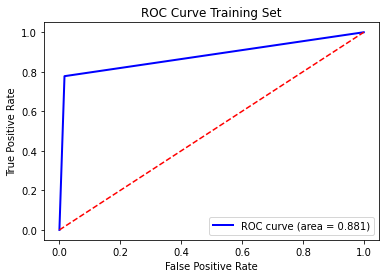

In [22]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
cm_train = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix (Train):\n", cm_train)

# Compute ROC curve and ROC area for each class
fpr,tpr,threshold = roc_curve(y_train, y_pred_train) 
# cal AUC value
roc_auc = auc(fpr,tpr)
 
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='blue', lw=lw, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC Curve Training Set')
plt.legend(loc = "lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [23]:
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()
print(result.summary())

         Current function value: 0.284367
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                   69
Model:                          Logit   Df Residuals:                       59
Method:                           MLE   Df Model:                            9
Date:                Thu, 02 Mar 2023   Pseudo R-squ.:                  0.2656
Time:                        20:34:48   Log-Likelihood:                -19.621
converged:                      False   LL-Null:                       -26.718
Covariance Type:            nonrobust   LLR p-value:                    0.1156
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
min2             -31.3630   1.65e+04     -0.002      0.998   -3.24e+04    3.24e+04
firstQuartile2    -0.4076      2.183     -0.187      

#### v. Test Classifier

In [24]:
l=6 #chosen from earlier step
csv_files_space = []

#read saved df
if path.exists('../saved_dfs/l'+str(l)+'_stats_test.csv') == True:
    df_2v = pd.read_csv('../saved_dfs/l'+str(l)+'_stats_test.csv',  index_col=0)
else:
    df_with_headers = headerCreation(l)
    df_2v = populateDataframe(l, df_with_headers, test_file_list, csv_files_space, 'test')
    path_write = '../saved_dfs/l'+str(l)+'_stats_test.csv' #write df to save time in concat 
    df_2v.to_csv(path_write, index=True)

# we only want std, mean, max
df_filtered = df_2v.filter(regex='(std[1-9]|max[1-9]|mean[1-9]|label)')
#display(df_filtered.head())

#prep trainY, trainX
mydf_filtered = df_filtered
trainY = mydf_filtered['label']
trainX = mydf_filtered.drop('label', axis=1)

#display("trainY.shape:", trainY.shape)
#display("trainX.shape:", trainX.shape)

trainX = trainX.to_numpy()
trainY = trainY.to_numpy()
trainY = np.array(trainY, dtype=np.int)

# Create a logistic regression model with no regularization
model = LogisticRegression(penalty='none', max_iter=100)

# Create a stratified k-fold cross-validation object with 5 folds
cv = StratifiedKFold(n_splits=5)

# Create a recursive feature elimination object with the logistic regression model and the cross-validation object
selector = RFECV(estimator=model, step=1, cv=cv, scoring='accuracy')

# Fit the recursive feature elimination object on the data
selector.fit(trainX, trainY)

best_features_select = selector.support_
true_indices = []

#select True valies and get index number
for i in range(len(best_features_select)):
    if best_features_select[i]:
        true_indices.append(i)

best_score = np.max(selector.grid_scores_)

print('The optimal features num = ', selector.n_features_)
print("index number of the optimal features = ", true_indices)
print("scores: ",  selector.grid_scores_[selector.n_features_ - 1])
print("Best Score:", best_score)

The optimal features num =  33
index number of the optimal features =  [0, 1, 3, 12, 13, 18, 19, 21, 30, 31, 33, 36, 48, 49, 51, 54, 55, 57, 60, 61, 66, 67, 72, 73, 78, 79, 84, 85, 91, 96, 97, 102, 103]
scores:  [1. 1. 1. 1. 1.]
Best Score: 1.0


I see both train & test l=6 have similar best score, but number of optimal features diff.

###### Extra for my better understanding (TEST CM & ROC)

Confusion Matrix (Train):
 [[15  0]
 [ 0  4]]


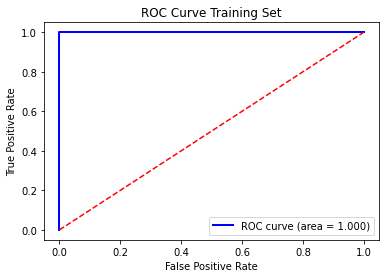

In [25]:
#load saved df to save computation time  
df_2v = pd.read_csv('../saved_dfs/l'+str(l)+'_stats_test.csv',  index_col=0)
X_train = df_2v.iloc[:, [0, 1, 3, 12, 13, 18, 19, 21, 30, 31, 33, 36, 48, 49, 51, 54, 55, 57, 60, 61, 66, 67, 72, 73, 78, 79, 84, 85, 91, 96, 97, 102, 103]]
y_train = df_2v.iloc[:, [-1]]

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
cm_train = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix (Train):\n", cm_train)

# Compute ROC curve and ROC area for each class
fpr,tpr,threshold = roc_curve(y_train, y_pred_train) 
# cal AUC value
roc_auc = auc(fpr,tpr)
 
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='blue', lw=lw, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC Curve Training Set')
plt.legend(loc = "lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#### vi. Separation

Do your classes seem to be well-separated to cause instability in calculating logistic regression parameters?

Yes:

1) The size of traning instances is small and we may need larger dataset

2) The p values 2 iv is large 

3) The test score is high and I was expecting a lower number 

#### vii. Imbalance

[[59 1]
[ 2 7]]

The top left cell (59) represents the number of true negatives (TN), which are instances that were correctly classified as the negative class.

The top right cell (1) represents the number of false positives (FP), which are instances that were incorrectly classified as the positive class.

The bottom left cell (2) represents the number of false negatives (FN), which are instances that were incorrectly classified as the negative class.

The bottom right cell (7) represents the number of true positives (TP), which are instances that were correctly classified as the positive class.

In this specific case, there are 59 true negatives and 7 true positives, indicating that the model is correctly identifying the majority of the positive class. However, there are also 2 false negatives and 1 false positive, which suggest that there may be room for improvement in the model's performance.

Confusion Matrix (Train):
 [[60  0]
 [ 0 60]]


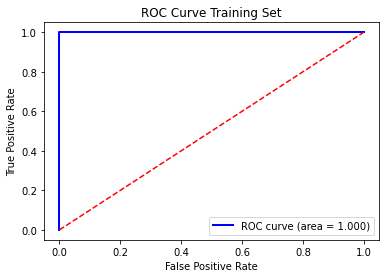

In [26]:
l=6
#read saved df
df_2v = pd.read_csv('../saved_dfs/l'+str(l)+'_stats.csv',  index_col=0)

# we only want std, mean, max
df_filtered = df_2v.filter(regex='(std[1-9]|max[1-9]|mean[1-9]|label)')
#display(df_filtered.head())

#prep trainY, trainX
mydf_filtered = df_filtered
trainY = mydf_filtered['label']
trainX = mydf_filtered.drop('label', axis=1)

#display("trainY.shape:", trainY.shape)
#display("trainX.shape:", trainX.shape)

trainX = trainX.to_numpy()
trainY = trainY.to_numpy()
trainY = np.array(trainY, dtype=np.int)

# RandomOverSampler
randomOverSamplerOut = RandomOverSampler(random_state = 42)
x_resample, y_resample = randomOverSamplerOut.fit_resample(trainX, trainY) 

model = LogisticRegression()
model.fit(x_resample, y_resample)
y_pred_train = model.predict(x_resample)
cm_train = confusion_matrix(y_resample, y_pred_train)
print("Confusion Matrix (Train):\n", cm_train)


# fit
#without decision function of the fitted model on the same resampled data was throwing an error
y_fit = model.fit(x_resample, y_resample).decision_function(x_resample) 

# roc_curve
fpr,tpr,threshold = roc_curve(y_resample, y_fit) 

# auc
roc_auc = auc(fpr,tpr)
 
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='blue', lw=lw, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC Curve Training Set')
plt.legend(loc = "lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Better result with:

Confusion Matrix (Train):
 [[60  0]
 [ 0 60]]

### (b) Binary Classification Using L1-penalized logistic regression

#### i. Time Series Segments

Repeat 2(a)iii using L1-penalized logistic regression,8 i.e. instead of using p- values for variable selection, use L1 regularization. Note that in this problem, you have to cross-validate for both l, the number of time series into which you break each of your instances, and λ, the weight of L1 penalty in your logistic regression objective function (or C, the budget). Packages usually perform cross-validation for λ automatically.

In [27]:
start_time = time.time()
csv_files_space = ['../data/AReM/bending2/dataset4.csv']

for l in range (1,21):
    
    print("L=",l)
    
    df_2bi=None
    
    #read saved df
    if path.exists('../saved_dfs/l'+str(l)+'_stats.csv') == True:
        df_2bi = pd.read_csv('../saved_dfs/l'+str(l)+'_stats.csv',  index_col=0)
    else:
        df_with_headers = headerCreation(l)
        df_2bi = populateDataframe(l, df_with_headers, train_file_list, csv_files_space, 'train')
        path_write = '../saved_dfs/l'+str(l)+'_stats.csv' #write df to save time in concat 
        df_2bi.to_csv(path_write, index=True)

    # we only want std, mean, max
    df_filtered = df_2bi.filter(regex='(std[1-9]|max[1-9]|mean[1-9]|label)')
    #display(df_filtered.head())

    #prep trainY, trainX
    mydf_filtered = df_filtered
    trainY = mydf_filtered['label']
    trainX = mydf_filtered.drop('label', axis=1)

    #display("trainY.shape:", trainY.shape)
    #display("trainX.shape:", trainX.shape)

    trainX = trainX.to_numpy()
    trainY = trainY.to_numpy()
    trainY = np.array(trainY, dtype=np.int)
    
    cross_valid = StratifiedKFold(shuffle=True, random_state=7, n_splits=5)

    # Fit the L1-penalized logistic regression model with cross-validation for both lambda and l
    model = LogisticRegressionCV(max_iter=100, penalty="l1", solver="liblinear", n_jobs=-1, cv=cross_valid)
    model.fit(trainX, trainY)
    
    train_model_score = model.score(trainX, trainY)
    print("train_model_score:", train_model_score)
    print("--------")
    

L= 1
train_model_score: 0.9855072463768116
--------
L= 2
train_model_score: 1.0
--------
L= 3
train_model_score: 1.0
--------
L= 4
train_model_score: 1.0
--------
L= 5
train_model_score: 1.0
--------
L= 6
train_model_score: 1.0
--------
L= 7
train_model_score: 0.9710144927536232
--------
L= 8
train_model_score: 0.9420289855072463
--------
L= 9
train_model_score: 1.0
--------
L= 10
train_model_score: 1.0
--------
L= 11
train_model_score: 1.0
--------
L= 12
train_model_score: 1.0
--------
L= 13
train_model_score: 1.0
--------
L= 14
train_model_score: 1.0
--------
L= 15
train_model_score: 1.0
--------
L= 16
train_model_score: 1.0
--------
L= 17
train_model_score: 1.0
--------
L= 18
train_model_score: 1.0
--------
L= 19
train_model_score: 1.0
--------
L= 20
train_model_score: 1.0
--------


In this step I am observing to get high scores which I would like to perform additional experiments to choose best l.

#### ii. Comparison

Note:

L1-penalized logistic regression:

>Advantage: The L1 penalty can automatically perform variable selection and shrink the coefficients of irrelevant features to zero. This can lead to more interpretable models, faster computation times, and potentially better generalization performance.

>Disadvantage: L1 regularization assumes that the relationship between the features and the outcome is linear, which may not be the case in all datasets. Additionally, the optimal regularization parameter needs to be selected through cross-validation, which can be time-consuming and computationally expensive.

Variable selection using p-values:


>Advantage: The p-value approach can be used with any regression method and does not require any assumptions about the linearity of the relationship between the features and the outcome. It can also be easier to interpret for those who are not familiar with machine learning models.

>Disadvantage: The p-value approach can be sensitive to multiple testing issues and may lead to overfitting or false positives. It can also be computationally expensive if the dataset has a large number of features.


Answer:

In general selection of method depend on dataset, the goals of the analysis, and the trade-offs between interpretability, computation time, and generalization performance. It's important to carefully evaluate both approaches and choose the one that best suits the needs of the analysis.

For this case, I found b_i is easier to implement and select as to go model. 

### (c) Multi-class Classification (The Realistic Case)

#### i. Time Series Segments

In [28]:
def populateDataframeMulticlass(l, stats_df, file_list, csv_files_space, type_data):
    
    for csv_path in file_list:
    
        #print(csv_path)  

        csv_path_split = csv_path.split('/')
        label = csv_path_split[3]

        if csv_path in csv_files_space:
            df = pd.read_csv(csv_path, comment='#', header=None, delimiter=r"\s+")

        else:
            df = pd.read_csv(csv_path, comment='#', header=None)

        df = df.drop(df.columns[[0]], axis=1) 

        ceil_num = int(np.ceil(df.shape[0]/l))
        #print("ceil_num:",ceil_num)
        
        split_tuple_range_list = list(zip(range(0, 499, ceil_num), range(0, 499, ceil_num)[1:]))
        merged_df = pd.concat([df.loc[e:f-1].reset_index(drop=True) for e,f in split_tuple_range_list], axis=1)
        #print("split_tuple_range_list:", split_tuple_range_list)
        #display(merged_df)

        multiply_num = len(split_tuple_range_list)
        merged_df.columns = [x for x in range(1,6*multiply_num+1)]
        
        if 'train' in type_data:
            path_write = '../saved_dfs/l'+str(l)+'_raw_multiclass.csv'
            merged_df.to_csv(path_write, index=True)
        else:
            path_write = '../saved_dfs/l'+str(l)+'_raw_test_multiclass.csv'
            merged_df.to_csv(path_write, index=True)

        new_row = {}
        for i in range(1, 6*l+1):
            new_row['max'+str(i)] = merged_df.describe()[i][3]
            new_row['min'+str(i)] = merged_df.describe()[i][3]
            new_row['max'+str(i)] = merged_df.describe()[i][7]
            new_row['mean'+str(i)] = merged_df.describe()[i][1]
            new_row['median'+str(i)] = merged_df.describe()[i][5]
            new_row['std'+str(i)] = merged_df.describe()[i][2]
            new_row['firstQuartile'+str(i)] = merged_df.describe()[i][4]
            new_row['thirdQuartile'+str(i)] = merged_df.describe()[i][6]
            
        
        if 'bending' in label:
            new_row['label'] = int(1)
        elif 'cycling' in label:
            new_row['label'] = int(2)
        elif 'lying' in label:
            new_row['label'] = int(3)
        elif 'sitting' in label:
            new_row['label'] = int(4)
        elif 'standing' in label:
            new_row['label'] = int(5)
        elif 'walking' in label:
            new_row['label'] = int(6)
            
        
        stats_df = stats_df.append(new_row, ignore_index=True)  

        #debug
        #display(merged_df.describe())
        #display(stats_df)
        #display(new_row)
        
    return stats_df


In [29]:
start_time = time.time()
test_error_list = []
best_model=None
best_trainX=None
best_trainY=None
best_testX=None
best_testY=None

for l in range (1,21):
    print("L=",l)
    df_2ci_train=None
    df_2ci_test=None
    
    #read saved df
    if path.exists('../saved_dfs/l'+str(l)+'_stats_train_multiclass.csv') == True:
        df_2ci_train = pd.read_csv('../saved_dfs/l'+str(l)+'_stats_train_multiclass.csv',  index_col=0)
    else:
        csv_files_space = ['../data/AReM/bending2/dataset4.csv']
        df_with_headers = headerCreation(l)
        df_2ci_train = populateDataframeMulticlass(l, df_with_headers, train_file_list, csv_files_space, 'train')
        path_write = '../saved_dfs/l'+str(l)+'_stats_train_multiclass.csv' #write df to save time in concat 
        df_2ci_train.to_csv(path_write, index=True)
        
        
    #read saved df
    if path.exists('../saved_dfs/l'+str(l)+'_stats_test_multiclass.csv') == True:
        df_2ci_test = pd.read_csv('../saved_dfs/l'+str(l)+'_stats_test_multiclass.csv',  index_col=0)
    else:
        csv_files_space = []
        df_with_headers = headerCreation(l)
        df_2ci_test = populateDataframeMulticlass(l, df_with_headers, test_file_list, csv_files_space, 'test')
        path_write = '../saved_dfs/l'+str(l)+'_stats_test_multiclass.csv' #write df to save time in concat 
        df_2ci_test.to_csv(path_write, index=True)

    # we only want std, mean, max
    df_filtered_train = df_2ci_train.filter(regex='(std[1-9]|max[1-9]|mean[1-9]|label)')
    #display(df_filtered_train.head())

    #prep trainY, trainX
    mydf_filtered_train = df_filtered_train
    trainY = mydf_filtered_train['label']
    trainX = mydf_filtered_train.drop('label', axis=1)

    #display("trainY.shape:", trainY.shape)
    #display("trainX.shape:", trainX.shape)

    trainX = trainX.to_numpy()
    trainY = trainY.to_numpy()
    #trainY = np.array(trainY, dtype=np.int)
    
    
    df_filtered_test = df_2ci_test.filter(regex='(std[1-9]|max[1-9]|mean[1-9]|label)')
    #display(df_filtered_test.head())
    
    #prep testY, testX
    mydf_filtered_test = df_filtered_test
    testY = mydf_filtered_test['label']
    testX = mydf_filtered_test.drop('label', axis=1)

    #display("testY.shape:", testY.shape)
    #display("testX.shape:", testX.shape)

    testX = testX.to_numpy()
    testY = testY.to_numpy()
    testY = np.array(testY, dtype=np.int)
        
    # Set up logistic regression model with L1 penalty and multinomial loss
    model = LogisticRegressionCV(Cs=10, penalty='l1', solver='saga', cv=5, multi_class='multinomial')

    # Fit the model on the training set
    model.fit(trainX, trainY)

    # Get the test error
    test_error = 1 - model.score(testX, testY)
    print(f"Test error: {test_error:.4f}")
    
    test_error_list.append(test_error)

    # Get the best regularization parameter
    best_c = model.C_[0]
    print(f"Best regularization parameter: {best_c:.4f}")    
    
    if l==9: #l=9 chosen as best
        best_model=model
        best_trainX=trainX
        best_trainY=trainY
        best_testX=testX
        best_testY=testY
        
    print("---------")
    
#best test error
print("best test error:", min(test_error_list))
print("best l=", test_error_list.index(min(test_error_list))+1)

end_time = time.time()
total_time = end_time - start_time
print("Total time taken:", total_time, "seconds")

L= 1
Test error: 0.1579
Best regularization parameter: 2.7826
---------
L= 2
Test error: 0.1579
Best regularization parameter: 21.5443
---------
L= 3
Test error: 0.2105
Best regularization parameter: 1291.5497
---------
L= 4
Test error: 0.1579
Best regularization parameter: 166.8101
---------
L= 5
Test error: 0.1579
Best regularization parameter: 21.5443
---------
L= 6
Test error: 0.1579
Best regularization parameter: 2.7826
---------
L= 7
Test error: 0.1579
Best regularization parameter: 0.3594
---------
L= 8
Test error: 0.1579
Best regularization parameter: 21.5443
---------
L= 9
Test error: 0.1053
Best regularization parameter: 21.5443
---------
L= 10
Test error: 0.1053
Best regularization parameter: 2.7826
---------
L= 11
Test error: 0.1053
Best regularization parameter: 1291.5497
---------
L= 12
Test error: 0.1053
Best regularization parameter: 2.7826
---------
L= 13
Test error: 0.1053
Best regularization parameter: 2.7826
---------
L= 14
Test error: 0.1053
Best regularization par

Research how confusion matrices and ROC curves are defined for multiclass classification and show them for this problem if possible.

In [30]:
# Get the predicted labels on the test set
testY_pred = best_model.predict(best_testX)
cm = confusion_matrix(best_testY, testY_pred)
print(f"Confusion matrix:\n", cm)

Confusion matrix:
 [[3 1 0 0 0 0]
 [0 3 0 0 0 0]
 [0 0 3 0 0 0]
 [0 0 0 3 0 0]
 [0 0 1 0 2 0]
 [0 0 0 0 0 3]]


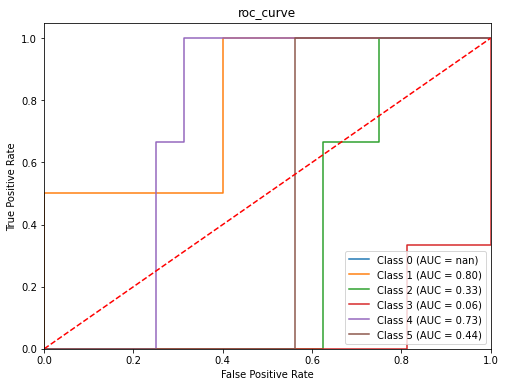

In [31]:
y_scores = best_model.decision_function(best_testX)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(6):
    fpr[i], tpr[i], _ = roc_curve(testY == i, y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(6):
    plt.plot(fpr[i], tpr[i], label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('roc_curve')
plt.legend(loc="lower right")
plt.show()

#### ii. Naive Bayes

Confusion matrices and ROC curves can be defined for multiclass classification using a one-vs-all approach or a one-vs-one approach.

In the one-vs-all approach, each class is treated as the positive class, and all other classes are treated as the negative class. The confusion matrix for each class is then computed as the number of true positives, false positives, false negatives, and true negatives for that class. The overall confusion matrix is then the sum of the confusion matrices for each class.

The ROC curve for each class is then computed by treating that class as the positive class and all other classes as the negative class. The true positive rate (TPR) and false positive rate (FPR) are computed at different threshold values, and the ROC curve is then plotted as TPR vs. FPR.

In the one-vs-one approach, a separate binary classifier is trained for each pair of classes. The confusion matrix and ROC curve are then computed for each binary classifier, and the overall confusion matrix and ROC curve are computed by summing the confusion matrices and combining the ROC curves using a weighted average.

In [32]:
start_time = time.time()
gaussian_error_list = []
multinomial_error_list = []

best_gaussian_model=None
best_gaussian_trainX=None
best_gaussian_trainY=None
best_gaussian_testX=None
best_gaussian_testY=None

best_multinomial_model=None
best_multinomial_trainX=None
best_multinomial_trainY=None
best_multinomial_testX=None
best_multinomial_testY=None


for l in range (1,21):
    print("L=",l)
    df_2ci_train=None
    df_2ci_test=None
    
    #read saved df
    if path.exists('../saved_dfs/l'+str(l)+'_stats_train_multiclass.csv') == True:
        df_2ci_train = pd.read_csv('../saved_dfs/l'+str(l)+'_stats_train_multiclass.csv',  index_col=0)
    else:
        csv_files_space = ['../data/AReM/bending2/dataset4.csv']
        df_with_headers = headerCreation(l)
        df_2ci_train = populateDataframeMulticlass(l, df_with_headers, train_file_list, csv_files_space, 'train')
        path_write = '../saved_dfs/l'+str(l)+'_stats_train_multiclass.csv' #write df to save time in concat 
        df_2ci_train.to_csv(path_write, index=True)
        
    #read saved df
    if path.exists('../saved_dfs/l'+str(l)+'_stats_test_multiclass.csv') == True:
        df_2ci_test = pd.read_csv('../saved_dfs/l'+str(l)+'_stats_test_multiclass.csv',  index_col=0)
    else:
        csv_files_space = []
        df_with_headers = headerCreation(l)
        df_2ci_test = populateDataframeMulticlass(l, df_with_headers, test_file_list, csv_files_space, 'test')
        path_write = '../saved_dfs/l'+str(l)+'_stats_test_multiclass.csv' #write df to save time in concat 
        df_2ci_test.to_csv(path_write, index=True)

    # we only want std, mean, max
    df_filtered_train = df_2ci_train.filter(regex='(std[1-9]|max[1-9]|mean[1-9]|label)')
    #display(df_filtered_train.head())

    #prep trainY, trainX
    mydf_filtered_train = df_filtered_train
    trainY = mydf_filtered_train['label']
    trainX = mydf_filtered_train.drop('label', axis=1)

    #display("trainY.shape:", trainY.shape)
    #display("trainX.shape:", trainX.shape)

    trainX = trainX.to_numpy()
    trainY = trainY.to_numpy()
    #trainY = np.array(trainY, dtype=np.int)
    
    df_filtered_test = df_2ci_test.filter(regex='(std[1-9]|max[1-9]|mean[1-9]|label)')
    #display(df_filtered_test.head())
    
    #prep testY, testX
    mydf_filtered_test = df_filtered_test
    testY = mydf_filtered_test['label']
    testX = mydf_filtered_test.drop('label', axis=1)

    #display("testY.shape:", testY.shape)
    #display("testX.shape:", testX.shape)

    testX = testX.to_numpy()
    testY = testY.to_numpy()
    testY = np.array(testY, dtype=np.int)
        
    # Train Gaussian Naive Bayes' classifier
    gnb = GaussianNB()
    gnb.fit(trainX, trainY)
    y_pred_gnb = gnb.predict(testX)
    acc_gnb = accuracy_score(testY, y_pred_gnb)
    gaussian_error_list.append(1-acc_gnb)

    # Train Multinomial Naive Bayes' classifier
    mnb = MultinomialNB()
    mnb.fit(trainX, trainY)
    y_pred_mnb = mnb.predict(testX)
    acc_mnb = accuracy_score(testY, y_pred_mnb)
    multinomial_error_list.append(1-acc_mnb)
    
    if l==2: #l=2 chosen as best gaussian
        best_gaussian_model=gnb
        best_gaussian_trainX=trainX
        best_gaussian_trainY=trainY
        best_gaussian_testX=testX
        best_gaussian_testY=testY
        
    if l==9: #l=9 chosen as best multinomial
        best_multinomial_model=mnb
        best_multinomial_trainX=trainX
        best_multinomial_trainY=trainY
        best_multinomial_testX=testX
        best_multinomial_testY=testY
        
    print(f"Gaussian Naive Bayes accuracy: {1-acc_gnb:.4f}")
    print(f"Multinomial Naive Bayes accuracy: {1-acc_mnb:.4f}")
    print("---------")
    
#best Score
smallest_number = min(gaussian_error_list)
all_smallest_numbers = [i for i, x in enumerate(gaussian_error_list) if x == smallest_number]
all_smallest_numbers = [x+1 for x in all_smallest_numbers] #increment by 1 to match L
print("best gaussian:", smallest_number)
print("best l=", all_smallest_numbers)

smallest_number = min(multinomial_error_list)
all_smallest_numbers = [i for i, x in enumerate(multinomial_error_list) if x == smallest_number]
all_smallest_numbers = [x+1 for x in all_smallest_numbers] #increment by 1 to match L
print("best multinomial:", smallest_number)
print("best l=", all_smallest_numbers)

end_time = time.time()
total_time = end_time - start_time
print("Total time taken:", total_time, "seconds")

L= 1
Gaussian Naive Bayes accuracy: 0.0526
Multinomial Naive Bayes accuracy: 0.1053
---------
L= 2
Gaussian Naive Bayes accuracy: 0.0526
Multinomial Naive Bayes accuracy: 0.2105
---------
L= 3
Gaussian Naive Bayes accuracy: 0.1053
Multinomial Naive Bayes accuracy: 0.1579
---------
L= 4
Gaussian Naive Bayes accuracy: 0.1053
Multinomial Naive Bayes accuracy: 0.1579
---------
L= 5
Gaussian Naive Bayes accuracy: 0.1053
Multinomial Naive Bayes accuracy: 0.1579
---------
L= 6
Gaussian Naive Bayes accuracy: 0.1053
Multinomial Naive Bayes accuracy: 0.1579
---------
L= 7
Gaussian Naive Bayes accuracy: 0.1579
Multinomial Naive Bayes accuracy: 0.1579
---------
L= 8
Gaussian Naive Bayes accuracy: 0.1579
Multinomial Naive Bayes accuracy: 0.1579
---------
L= 9
Gaussian Naive Bayes accuracy: 0.1579
Multinomial Naive Bayes accuracy: 0.1579
---------
L= 10
Gaussian Naive Bayes accuracy: 0.1053
Multinomial Naive Bayes accuracy: 0.1053
---------
L= 11
Gaussian Naive Bayes accuracy: 0.1579
Multinomial Nai

#### Gaussian:

In [33]:
# Get the predicted labels on the test set
testY_pred = best_gaussian_model.predict(best_gaussian_testX)
cm = confusion_matrix(best_gaussian_testY, testY_pred)
print(f"Confusion matrix:\n", cm)

Confusion matrix:
 [[4 0 0 0 0 0]
 [0 3 0 0 0 0]
 [0 0 3 0 0 0]
 [0 0 0 3 0 0]
 [0 0 0 1 2 0]
 [0 0 0 0 0 3]]


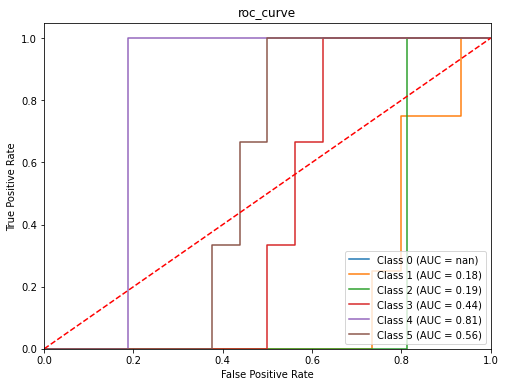

In [34]:
y_scores = best_gaussian_model.predict_log_proba(best_gaussian_testX)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(6):
    fpr[i], tpr[i], _ = roc_curve(testY == i, y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(6):
    plt.plot(fpr[i], tpr[i], label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('roc_curve')
plt.legend(loc="lower right")
plt.show()

#### Multinomial:

In [35]:
# Get the predicted labels on the test set
testY_pred = best_multinomial_model.predict(best_multinomial_testX)
cm = confusion_matrix(best_multinomial_testY, testY_pred)
print(f"Confusion matrix:\n", cm)

Confusion matrix:
 [[4 0 0 0 0 0]
 [0 3 0 0 0 0]
 [0 0 2 1 0 0]
 [0 0 0 2 1 0]
 [0 0 0 1 2 0]
 [0 0 0 0 0 3]]


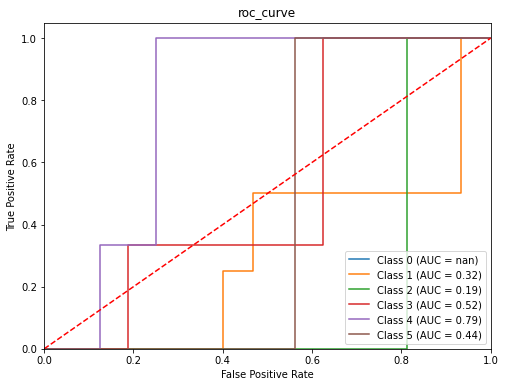

In [36]:
y_scores = best_multinomial_model.predict_log_proba(best_multinomial_testX)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(6):
    fpr[i], tpr[i], _ = roc_curve(testY == i, y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(6):
    plt.plot(fpr[i], tpr[i], label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('roc_curve')
plt.legend(loc="lower right")
plt.show()

#### ii. Comparison

After comparing all steps in multiclass reg, I feel we need more dataset to get a better result in general. For what I have so far, I would chose gaussian or multinomial.

best test error: 0.10526315789473684

best l= 9

------------

best gaussian: 0.052631578947368474

best l= [1, 2]

-----------

best multinomial: 0.052631578947368474

best l= [11, 17, 18, 19, 20]

## 3. ISLR 4.8.3

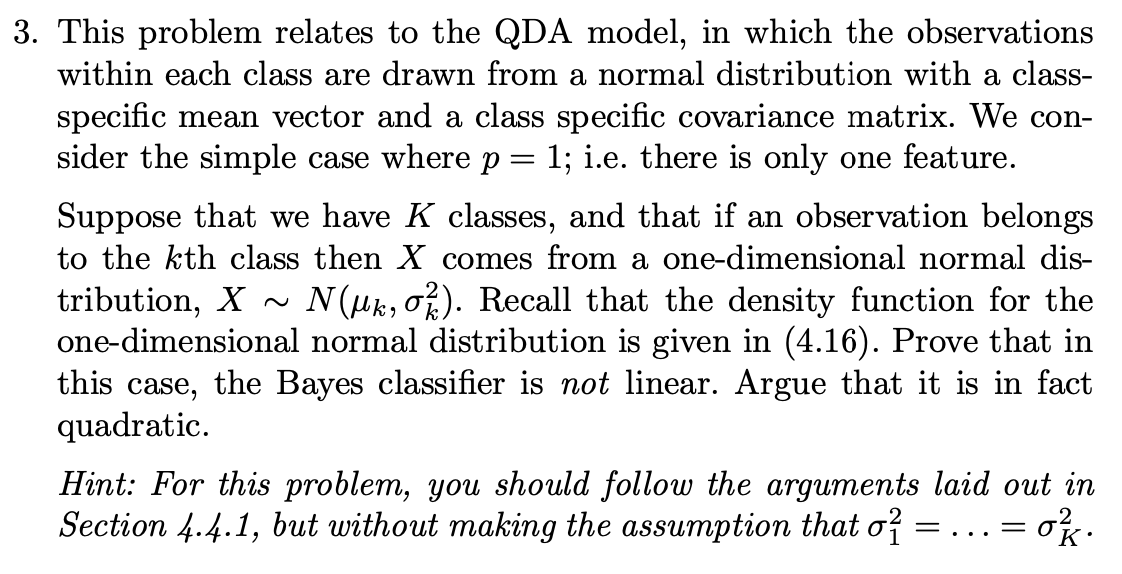

QDA (Quadratic Discriminant Analysis) is a statistical classification algorithm that models the distribution of each class using a quadratic function. It is a type of supervised learning algorithm used for classification tasks, where the goal is to predict the class of a new observation based on its features.

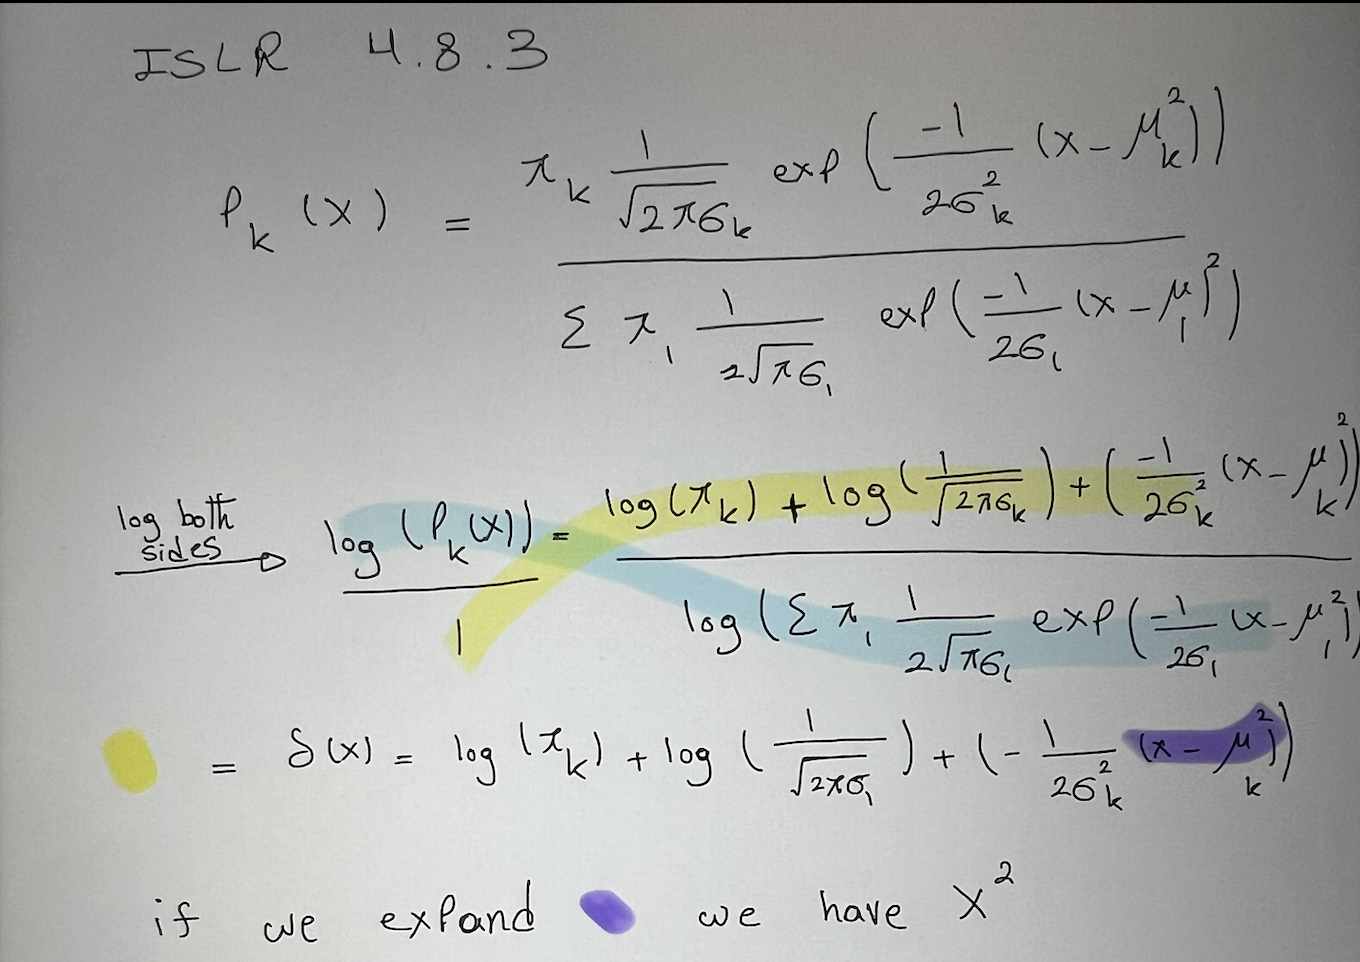

## 4. ISLR 4.8.7

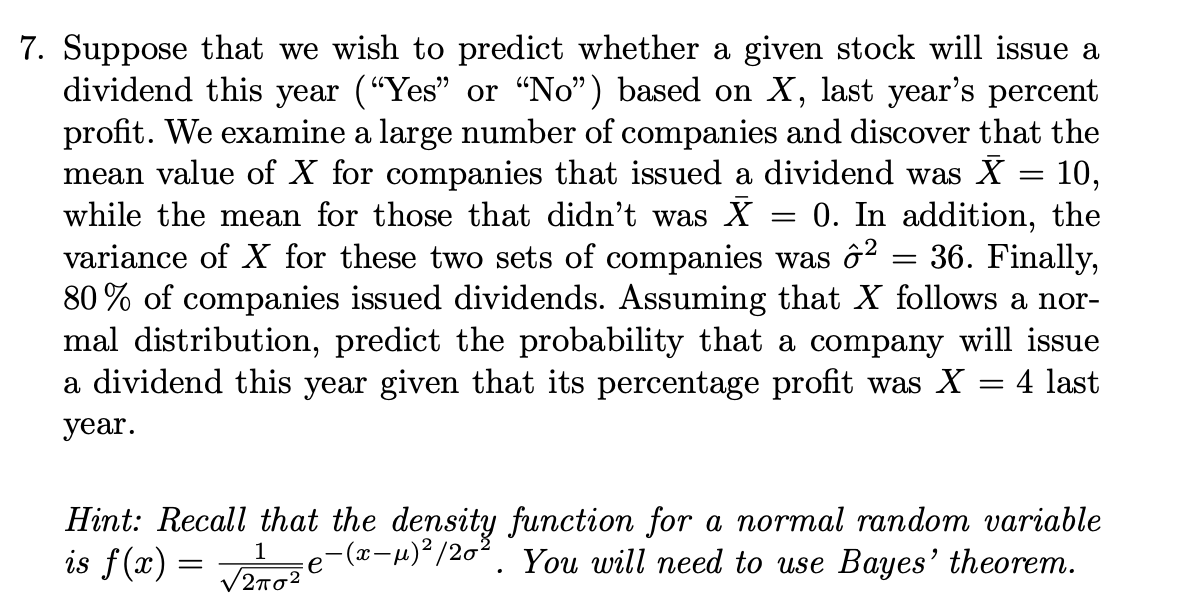

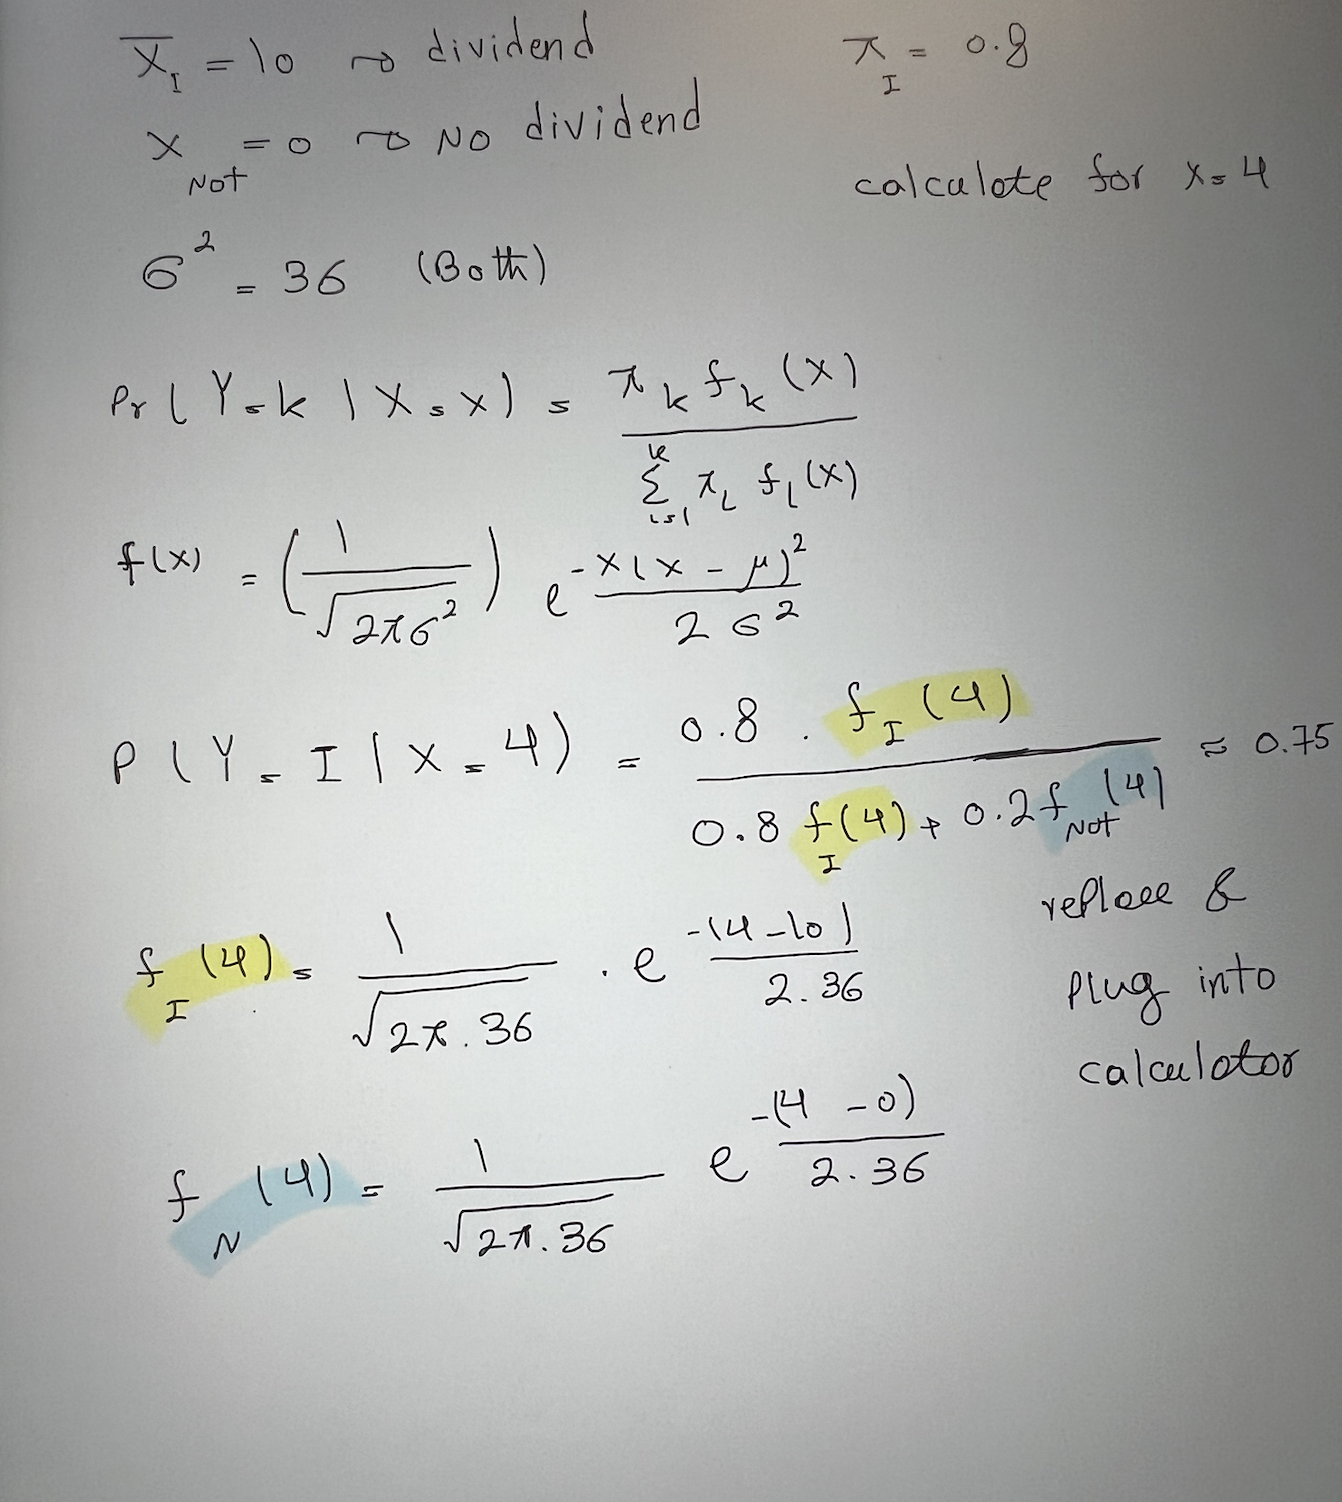